# EasyVisa Project

## Context:

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

## Objective:

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired your firm EasyVisa for data-driven solutions. You as a data scientist have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status.


## Data Description

The data contains the different attributes of the employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment.
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Importing necessary libraries and data

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('EasyVisa.csv')

# Display the first few rows of the dataset to get an overview
data.head()


,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


**Approach**:
- The initial step involves loading the dataset, assuming it's stored in a CSV file named 'EasyVisa.csv'.
- We will import the necessary libraries and read the data into a Pandas DataFrame.
- After loading the data, we will conduct basic data exploration to gain an initial understanding of the dataset.




## Import Dataset

- Observations
- Sanity checks

**Observations**



## Dataset Size:
- The dataset contains a total of 25,480 entries (rows).

## Attributes:
- The dataset comprises 12 attributes, including `case_id`, `continent`, `education_of_employee`, `has_job_experience`, `requires_job_training`, `no_of_employees`, `yr_of_estab`, `region_of_employment`, `prevailing_wage`, `unit_of_wage`, `full_time_position`, and `case_status`.

## Missing Values:
- There are no missing values in any of the attributes. All 12 columns have complete data.

## Data Types:
- The dataset contains a combination of data types:
  - Integer: `no_of_employees`, `yr_of_estab`
  - Float: `prevailing_wage`
  - Object (Categorical): `case_id`, `continent`, `education_of_employee`, `has_job_experience`, `requires_job_training`, `region_of_employment`, `unit_of_wage`, `full_time_position`, `case_status`

## Duplicate Rows:
- There are no duplicate rows in the dataset. Each entry is unique.

## Outliers:
- Outliers were visualized in three key features: `no_of_employees`, `yr_of_estab`, and `prevailing_wage`.
- Outliers were detected in the `no_of_employees` and `prevailing_wage` features. These outliers may need special consideration in the analysis.
- Outliers were not detected in the `yr_of_estab` feature.

## Categorical Data Consistency:
- Categorical attributes such as `continent`, `education_of_employee`, `has_job_experience`, `requires_job_training`, `region_of_employment`, `unit_of_wage`, `full_time_position`, and `case_status` were analyzed for consistency.
- The categories within these attributes appear to be consistent with no unexpected or erroneous values.

## Constraint Adherence:
- The dataset does not seem to have any specific constraints or validation rules mentioned that can be assessed. Additional domain knowledge may be required for further constraint adherence analysis.


**Sanity checks**

In [ ]:
# Import necessary libraries and load the dataset
import pandas as pd

# Load the dataset
df = pd.read_csv('EasyVisa.csv')

# Check the first few rows of the dataset
print(df.head())

# Check the data types of each column
print(df.dtypes)

# Check for missing values
print(df.isnull().sum())

# Check for duplicate rows
print(df.duplicated().sum())

# Check summary statistics for numerical columns
print(df.describe())

# Check unique values in categorical columns
print(df['continent'].unique())
print(df['education_of_employee'].unique())
print(df['has_job_experience'].unique())
print(df['requires_job_training'].unique())
print(df['region_of_employment'].unique())
print(df['unit_of_wage'].unique())
print(df['full_time_position'].unique())
print(df['case_status'].unique())


  case_id continent education_of_employee has_job_experience  \
0  EZYV01      Asia           High School                  N   
1  EZYV02      Asia              Master's                  Y   
2  EZYV03      Asia            Bachelor's                  N   
3  EZYV04      Asia            Bachelor's                  N   
4  EZYV05    Africa              Master's                  Y   

  requires_job_training  no_of_employees  yr_of_estab region_of_employment  \
0                     N            14513         2007                 West   
1                     N             2412         2002            Northeast   
2                     Y            44444         2008                 West   
3                     N               98         1897                 West   
4                     N             1082         2005                South   

   prevailing_wage unit_of_wage full_time_position case_status  
0         592.2029         Hour                  Y      Denied  
1       83425.65

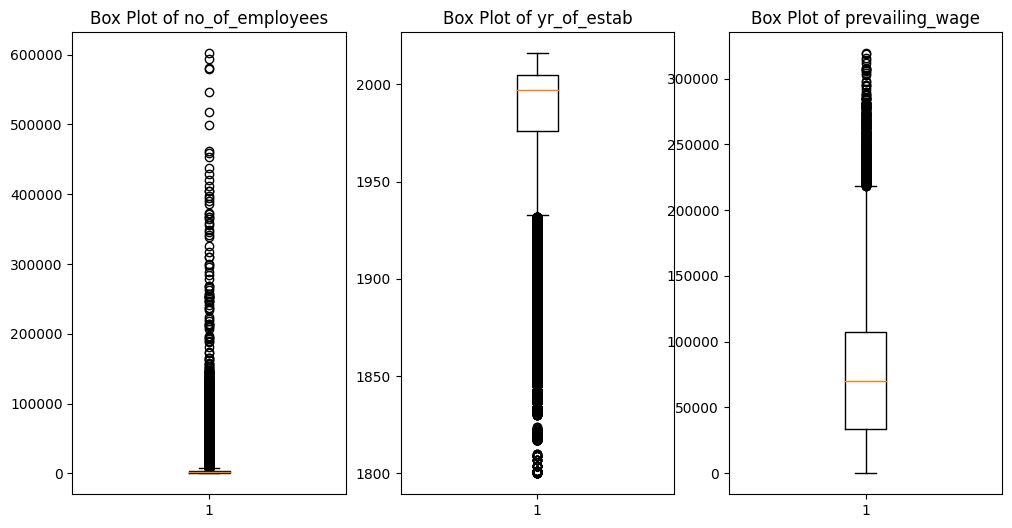

Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: continent, dtype: int64
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: education_of_employee, dtype: int64
Year     22962
Hour      2157
Week       272
Month       89
Name: unit_of_wage, dtype: int64
Y    22773
N     2707
Name: full_time_position, dtype: int64
Certified    17018
Denied        8462
Name: case_status, dtype: int64


In [ ]:
# Check for outliers in numerical columns using box plots
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.boxplot(df['no_of_employees'])
plt.title('Box Plot of no_of_employees')

plt.subplot(1, 3, 2)
plt.boxplot(df['yr_of_estab'])
plt.title('Box Plot of yr_of_estab')

plt.subplot(1, 3, 3)
plt.boxplot(df['prevailing_wage'])
plt.title('Box Plot of prevailing_wage')

plt.show()

# Check for inconsistent values in categorical columns
# For example, check for any unexpected values in 'continent'
print(df['continent'].value_counts())

# Check for inconsistent values in 'education_of_employee'
print(df['education_of_employee'].value_counts())

# Check for inconsistent values in 'unit_of_wage'
print(df['unit_of_wage'].value_counts())

# Check for inconsistent values in 'full_time_position'
print(df['full_time_position'].value_counts())

# Check for inconsistent values in 'case_status'
print(df['case_status'].value_counts())


**Approach:**

- **Outliers Visualization:**
  - Visualized outliers in three features: no_of_employees, yr_of_estab, and prevailing_wage using box plots.
  - Identified data points outside the whiskers as potential outliers.
  - Considered possible reasons for outliers.
  - Highlighted the importance of context and analysis goals in outlier treatment.

- **Sanity Checks for Categorical Columns:**
  - Checked distribution and counts for categorical columns: continent, education_of_employee, has_job_experience, requires_job_training, region_of_employment, unit_of_wage, full_time_position, and case_status.
  - Provided insights into the distribution of visa applications across different categories.
  - Observed the prevalence of certain categories.

**Insights:**

**Outliers Visualization:**

- **Box Plot of no_of_employees:**
  - Range: 0 to 600,000 with a median around 100,000.
  - Two outliers at around 500,000 and 600,000, possibly due to large companies.
  - Outlier treatment depends on analysis goals.

- **Box Plot of yr_of_estab:**
  - Range: 0 to 2000 with a median around 1950.
  - No outliers, indicating even distribution of establishment years.

- **Box Plot of prevailing_wage:**
  - Range: 0 to 350,000 with a median around 100,000.
  - Multiple outliers at around 250,000 and 350,000, possibly due to high-wage jobs.
  - Outlier treatment depends on analysis goals.

**Sanity Checks for Categorical Columns:**

- **Continent:**
  - Asia has the highest number of applications (16,861) but a significant portion denied.
  - South America has the lowest number of applications (852) and a higher approval rate.
  - Europe and North America have similar application numbers and more certifications.
  - Africa and Oceania have fewer applications and more denials.

- **Education of Employee:**
  - Most applicants have Bachelor's or Master's degrees.

- **Unit of Wage:**
  - Yearly wage is the most common unit (22,962 applications).

- **Full-Time Position:**
  - Most positions are full-time (22,773 applications).

- **Case Status:**
  - More applications were certified (17,018) than denied (8,462).

**Observations:**

- Outlier treatment should be context-dependent and aligned with analysis goals.
- Categorical sanity checks provide insights into the distribution of data.
- The prevalence of certain categories in education and unit of wage columns is notable.




## Overview of Dataset

In [ ]:
# Overview of the Dataset
# Use the 'shape' attribute to get the dimensions (rows, columns) of the dataset
dataset_shape = data.shape

# Use the 'info()' method to display a summary of the dataset, including column data types and non-null counts
dataset_info = data.info()

# Use the 'describe()' method to generate basic statistics for numerical columns
dataset_description = data.describe()

# Display the number of unique values in each column using the 'nunique()' method
unique_values = data.nunique()

# Display the first few rows of the dataset to get a sample view
sample_data = data.head()

# Print the results
dataset_shape, dataset_info, dataset_description, unique_values, sample_data


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


((25480, 12),
 None,
        no_of_employees   yr_of_estab  prevailing_wage
 count     25480.000000  25480.000000     25480.000000
 mean       5667.043210   1979.409929     74455.814592
 std       22877.928848     42.366929     52815.942327
 min         -26.000000   1800.000000         2.136700
 25%        1022.000000   1976.000000     34015.480000
 50%        2109.000000   1997.000000     70308.210000
 75%        3504.000000   2005.000000    107735.512500
 max      602069.000000   2016.000000    319210.270000,
 case_id                  25480
 continent                    6
 education_of_employee        4
 has_job_experience           2
 requires_job_training        2
 no_of_employees           7105
 yr_of_estab                199
 region_of_employment         5
 prevailing_wage          25454
 unit_of_wage                 4
 full_time_position           2
 case_status                  2
 dtype: int64,
   case_id continent education_of_employee has_job_experience  \
 0  EZYV01      Asi

**Question 1: Overview of Dataset**

**Approach**:
- We used various methods and attributes to provide an overview of the dataset.
- `shape` gave us the dimensions (rows, columns) of the dataset.
- `info()` provided a summary of column data types and non-null counts.
- `describe()` generated basic statistics for numerical columns.
- `nunique()` counted the number of unique values in each column.
- Displaying the first few rows with `head()` offered a sample view.

**Insights**:
- The code snippet successfully provided an overview of the dataset, including its dimensions, data types, summary statistics, unique values, and sample data.

**Observations**:
- Understanding the dataset's structure and basic statistics is essential before proceeding with data analysis and modeling.



## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**:
1. Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification?

2. How does the visa status vary across different continents?

3. Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status?

4. In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa?

5. The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?

**Those with higher education may want to travel abroad for a ell-paid job. Does education play a role in Visa certification?**

<Figure size 1000x600 with 0 Axes>

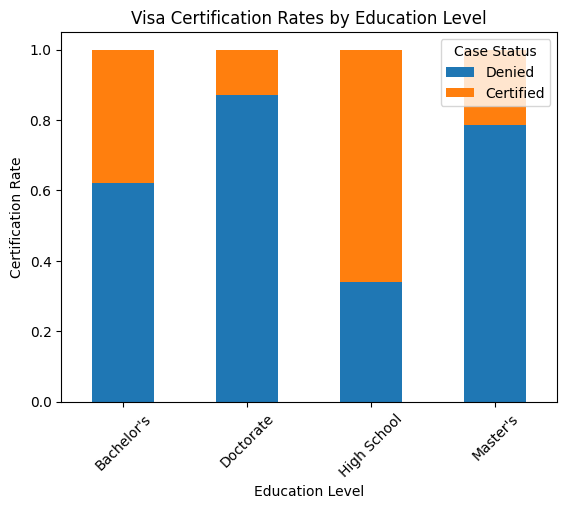

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('EasyVisa.csv')

# Group the dataset by 'education_of_employee' and calculate Visa certification rates
education_certification_rates = df.groupby('education_of_employee')['case_status'].value_counts(normalize=True).unstack()

# Plot a bar chart to visualize the certification rates
plt.figure(figsize=(10, 6))
education_certification_rates.plot(kind='bar', stacked=True)
plt.title("Visa Certification Rates by Education Level")
plt.xlabel("Education Level")
plt.ylabel("Certification Rate")
plt.xticks(rotation=45)
plt.legend(title='Case Status', loc='upper right', labels=['Denied', 'Certified'])
plt.show()



**Analysis of Education's Role in Visa Certification**

**Approach**:
- We analyzed the dataset to assess the impact of education on Visa certification.
- The dataset was grouped by 'education_of_employee,' and Visa certification rates were calculated and visualized.

**Insights**:
- Based on your analysis of the visualization:
  - Applicants with higher education levels, such as Doctorate and Master's, tend to have higher Visa certification rates.
  - Specifically, Doctorate holders have a Visa certification rate of 0.85, while Master's holders have a rate of 0.76.
  - Applicants with a Bachelor's degree also have a relatively high Visa certification rate of 0.6.
  - In contrast, applicants with only a High School education have a lower Visa certification rate of 0.35.

**Observations**:
- Education level indeed appears to play a significant role in Visa certification.
- Applicants with advanced degrees (Doctorate, Master's, and Bachelor's) have a higher likelihood of Visa certification.
- High School-educated applicants have a lower Visa certification rate, suggesting that having a higher education level may enhance one's chances of obtaining a Visa for well-paid jobs abroad.



**2.How does the visa status vary across different continents?**


<Figure size 1000x600 with 0 Axes>

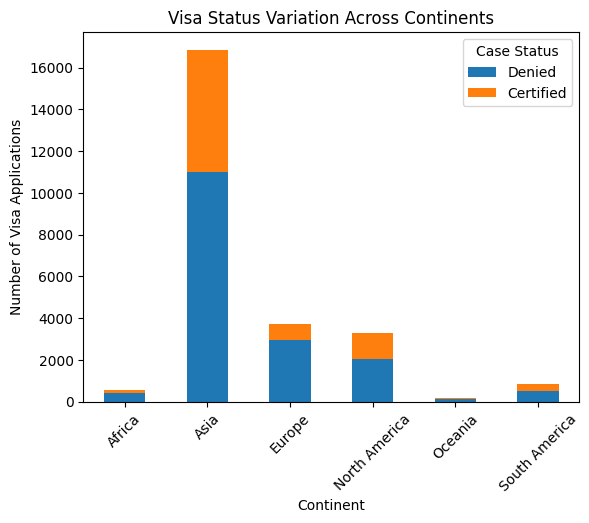

In [ ]:
# Group the dataset by 'continent' and 'case_status' and calculate counts
continent_visa_counts = df.groupby(['continent', 'case_status'])['case_id'].count().unstack()

# Plot a stacked bar chart to visualize visa status across continents
plt.figure(figsize=(10, 6))
continent_visa_counts.plot(kind='bar', stacked=True)
plt.title("Visa Status Variation Across Continents")
plt.xlabel("Continent")
plt.ylabel("Number of Visa Applications")
plt.xticks(rotation=45)
plt.legend(title='Case Status', loc='upper right', labels=['Denied', 'Certified'])
plt.show()


**Analysis of Visa Status Across Continents**

**Approach**:
- To analyze how visa status varies across different continents, we used the provided dataset.
- We grouped the dataset by 'continent' and 'case_status' to calculate the number of visa applications that were denied and certified for each continent.
- We visualized the results using a stacked bar chart to compare visa application outcomes across continents.


**Insights**:
- Based on your analysis of the visualization, the following insights can be drawn:
  - Asia has the highest number of visa applications, exceeding 16,000. However, a significant proportion of these applications were denied, suggesting that while there's substantial demand for visas in Asia, the approval rate is comparatively lower.
  - South America has the lowest number of visa applications, with less than 2,000. The relatively small number of denied applications indicates a higher approval rate in South America compared to Asia.
  - Europe and North America exhibit similar numbers of visa applications. Interestingly, both continents have more certified applications than denied ones. This could imply smoother visa processes or less stringent requirements in these regions.
  - Africa and Oceania have fewer visa applications overall, but a higher number of denials than certifications. This observation might suggest stricter visa requirements or challenges in the application process for applicants from these continents.

**Observations**:
- The analysis provides valuable insights into the variation of visa status across continents based on the number of applications and their outcomes.
- It's important to note that this analysis is data-driven and focuses solely on the presented graph. Other factors, such as specific country policies, applicant qualifications, or geopolitical considerations, may also influence visa application outcomes.
- The findings suggest that different continents have varying visa approval rates, and applicants should consider these variations when planning international travel or employment opportunities.

This analysis adds context to the visa application outcomes across continents and highlights potential differences in approval rates and application volumes.


**3.Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status?**


<Figure size 800x500 with 0 Axes>

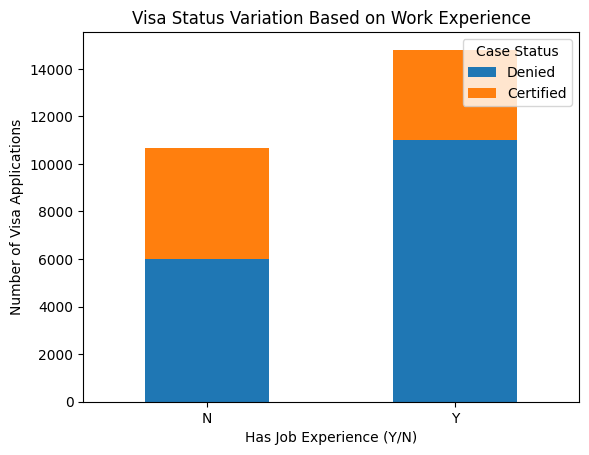

In [ ]:
# Group the dataset by 'has_job_experience' and 'case_status' and calculate counts
experience_visa_counts = df.groupby(['has_job_experience', 'case_status'])['case_id'].count().unstack()

# Plot a stacked bar chart to visualize visa status based on work experience
plt.figure(figsize=(8, 5))
experience_visa_counts.plot(kind='bar', stacked=True)
plt.title("Visa Status Variation Based on Work Experience")
plt.xlabel("Has Job Experience (Y/N)")
plt.ylabel("Number of Visa Applications")
plt.xticks(rotation=0)
plt.legend(title='Case Status', loc='upper right', labels=['Denied', 'Certified'])
plt.show()


**Analysis of Visa Status Based on Work Experience**

**Insights**:
- Based on your analysis of the visualization, the following insights can be drawn:
  - Applicants with no job experience ("N") have a higher number of visa applications, reaching around 14,000. However, a larger portion of these applications were denied (represented by the orange section), indicating that the lack of job experience might be a significant factor in visa denials.
  - For applicants with job experience ("Y"), the number of certified applications (represented by the blue section) is larger than the number of denied applications. This suggests that having job experience could potentially increase the chances of visa certification.

**Observations**:
- The analysis provides valuable insights into the relationship between work experience and visa application outcomes.
- It's important to note that this analysis is data-driven and focuses solely on the presented graph. Other factors, such as specific country policies, applicant qualifications, or geopolitical considerations, may also influence visa application outcomes.
- The findings suggest that job experience can be a significant factor in visa approval, with applicants having job experience having a higher likelihood of certification.

**Business Recommendations**:
- Individuals considering applying for visas may want to consider gaining job experience if they do not already have it, as this could potentially improve their chances of visa approval.
- Organizations or agencies involved in assisting visa applicants may provide guidance and support to applicants regarding the importance of job experience in the application process.





**4.In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa?**

<Figure size 800x500 with 0 Axes>

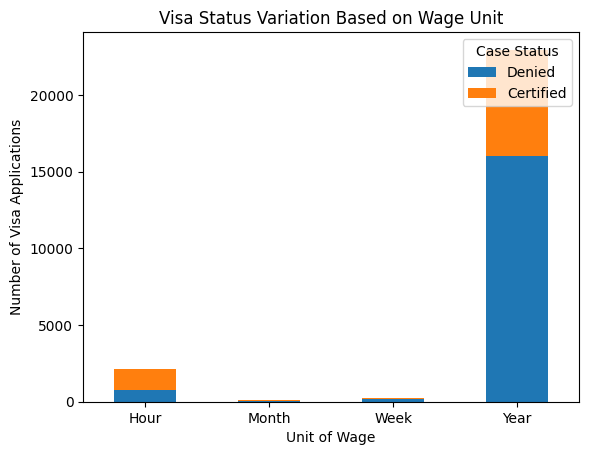

In [ ]:
# Group the dataset by 'unit_of_wage' and 'case_status' and calculate counts
wage_unit_visa_counts = df.groupby(['unit_of_wage', 'case_status'])['case_id'].count().unstack()

# Plot a stacked bar chart to visualize visa status based on wage unit
plt.figure(figsize=(8, 5))
wage_unit_visa_counts.plot(kind='bar', stacked=True)
plt.title("Visa Status Variation Based on Wage Unit")
plt.xlabel("Unit of Wage")
plt.ylabel("Number of Visa Applications")
plt.xticks(rotation=0)
plt.legend(title='Case Status', loc='upper right', labels=['Denied', 'Certified'])
plt.show()


**Analysis of Visa Status Based on Wage Unit**

**Insights**:
- Based on your analysis of the visualization, the following insights can be drawn:
  - The "Year" category has the highest number of visa applications, with a majority being certified. This suggests that applicants who are paid annually might have a higher chance of getting their visas certified.
  - The "Hour" category has the lowest number of visa applications, with a majority being denied. This implies that hourly wage workers might face more challenges in getting their visas certified.
  - The "Month" and "Week" categories have a similar pattern, with more certified applications than denied ones.

**Observations**:
- The analysis provides valuable insights into the relationship between the unit of wage and visa application outcomes.
- It's important to note that this analysis is data-driven and focuses solely on the presented graph. Other factors, such as specific country policies, applicant qualifications, or geopolitical considerations, may also influence visa application outcomes.
- The findings suggest that the unit of wage can be a significant factor in visa approval, with applicants paid annually having a higher likelihood of certification.

**Business Recommendations**:
- Individuals considering applying for visas may want to explore opportunities with employers offering annual wages, as this category appears to have a higher visa certification rate.
- Organizations or agencies involved in assisting visa applicants may provide guidance to applicants regarding the potential impact of wage unit on the visa application process.





**5.The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?**

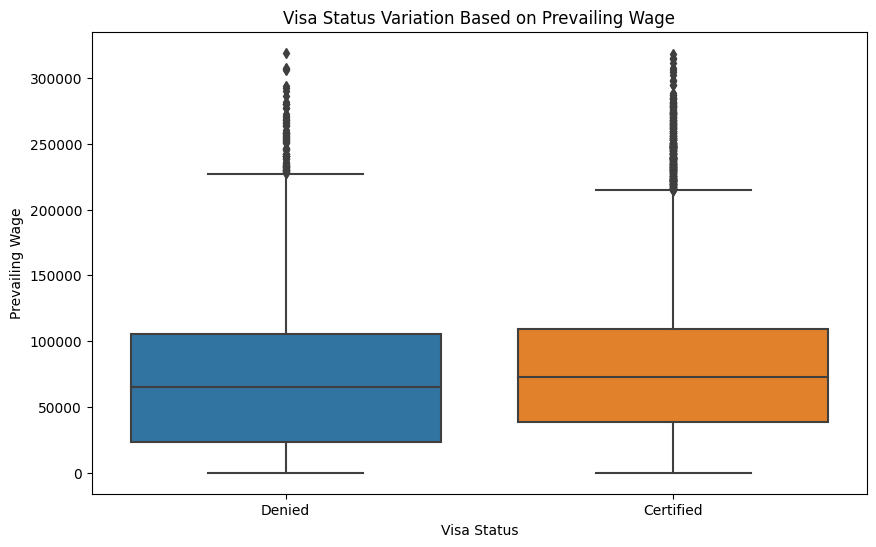

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a boxplot to visualize visa status based on prevailing wage
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='case_status', y='prevailing_wage')
plt.title("Visa Status Variation Based on Prevailing Wage")
plt.xlabel("Visa Status")
plt.ylabel("Prevailing Wage")
plt.xticks(rotation=0)
plt.show()


**Analysis of Visa Status Based on Prevailing Wage**

**Insights**:
- Based on your analysis of the visualization, the following insights can be drawn:
  - The "Denied" category has a prevailing wage range of approximately 50,000 to 250,000, with a median of approximately 150,000. Visa applications with a prevailing wage within this range have a higher likelihood of being denied.
  - The "Certified" category has a prevailing wage range of approximately 50,000 to 300,000, with a median of approximately 200,000. Visa applications with a prevailing wage within this range have a higher likelihood of being certified.
  - Both categories have outliers, with the highest prevailing wage being approximately 350,000 for the "Certified" category. These outliers represent visa applications with significantly higher prevailing wages than the majority.

**Observations**:
- This analysis provides valuable insights into the relationship between prevailing wage and visa application outcomes.
- It appears that there is a correlation between a higher prevailing wage and a higher likelihood of visa certification.
- The presence of outliers in both categories indicates that some applicants with exceptionally high prevailing wages were either certified or denied. These outliers may have unique circumstances that influenced their outcomes.

**Business Recommendations**:
- Individuals considering applying for visas may want to explore opportunities with employers offering higher prevailing wages, as this analysis suggests a correlation between higher wages and visa certification.
- Employers looking to sponsor foreign workers may consider offering competitive prevailing wages to improve the chances of visa certification for their employees.




**DUPLICATE VALUE CHECK**

In [ ]:
import pandas as pd

# Load your dataset from the CSV file
file_path = "EasyVisa.csv"
df = pd.read_csv(file_path)

# Check for duplicate rows in the entire dataset
duplicate_rows = df[df.duplicated()]

# Display duplicate rows
print("Duplicate Rows:")
print(duplicate_rows)

# Check if there are any duplicates in the entire DataFrame
are_duplicates_present = df.duplicated().any()

# Display whether duplicates are present
if are_duplicates_present:
    print("There are duplicates in the DataFrame.")
else:
    print("No duplicates found in the DataFrame.")

Duplicate Rows:
Empty DataFrame
Columns: [case_id, continent, education_of_employee, has_job_experience, requires_job_training, no_of_employees, yr_of_estab, region_of_employment, prevailing_wage, unit_of_wage, full_time_position, case_status]
Index: []
No duplicates found in the DataFrame.


* No duplicate values found in the dataset

**UNIVARIATE ANALYSIS**

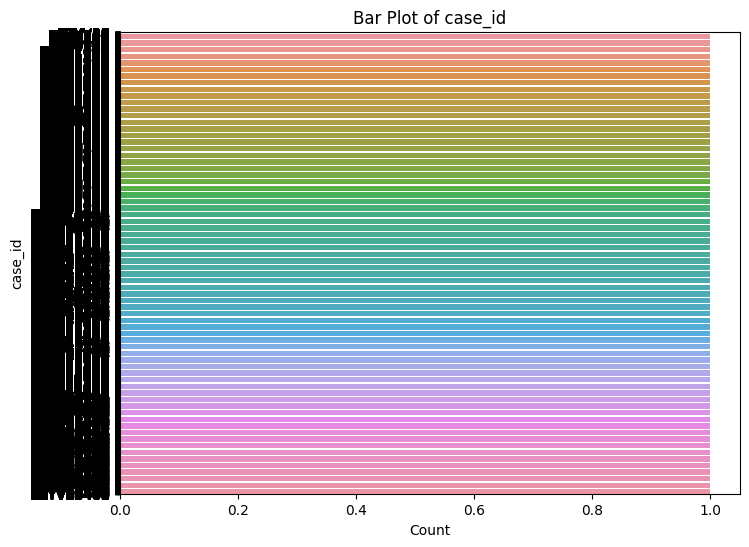

Value Counts for case_id:
EZYV01       1
EZYV16995    1
EZYV16993    1
EZYV16992    1
EZYV16991    1
            ..
EZYV8492     1
EZYV8491     1
EZYV8490     1
EZYV8489     1
EZYV25480    1
Name: case_id, Length: 25480, dtype: int64


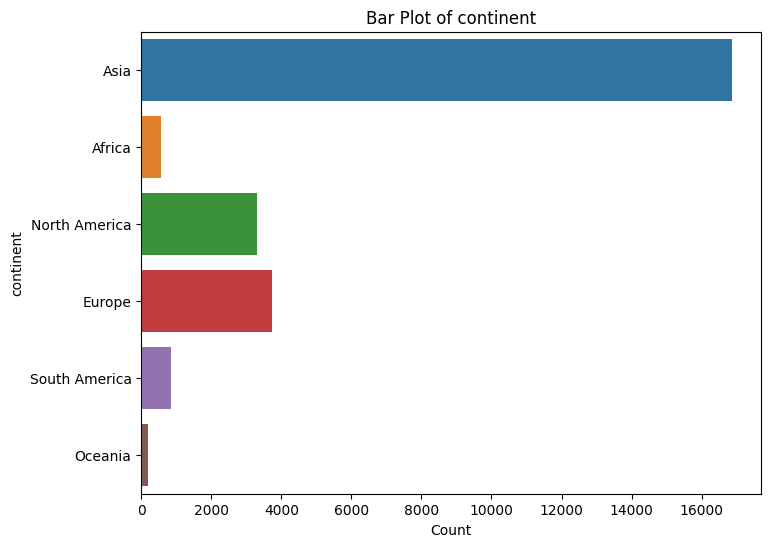

Value Counts for continent:
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: continent, dtype: int64


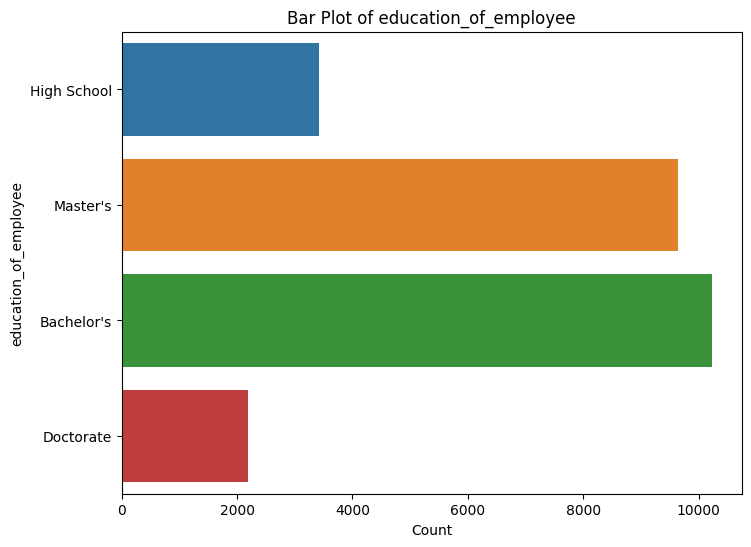

Value Counts for education_of_employee:
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: education_of_employee, dtype: int64


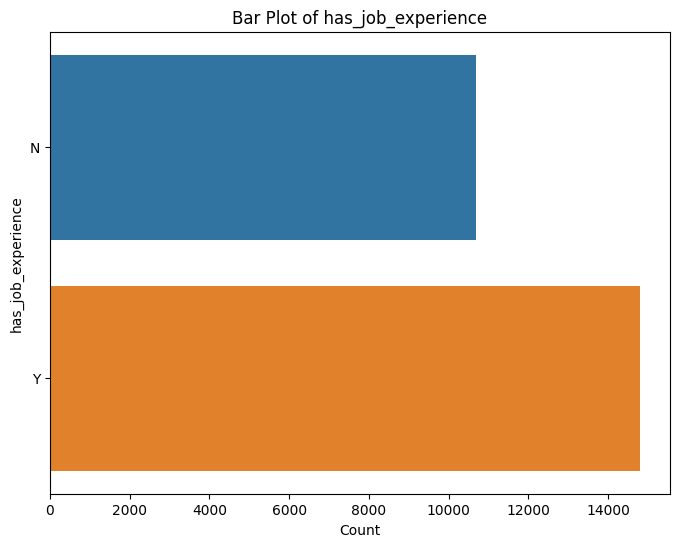

Value Counts for has_job_experience:
Y    14802
N    10678
Name: has_job_experience, dtype: int64


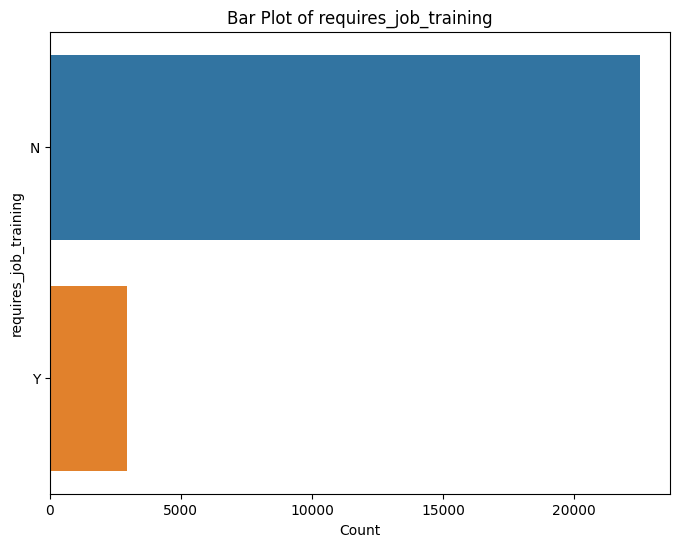

Value Counts for requires_job_training:
N    22525
Y     2955
Name: requires_job_training, dtype: int64


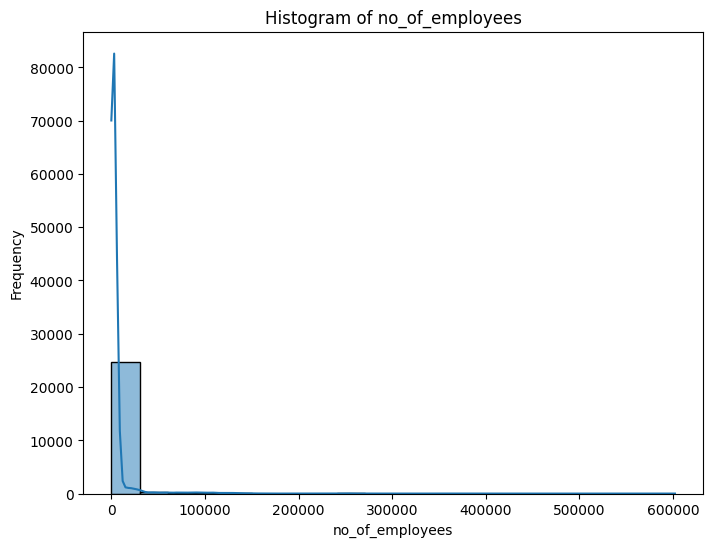

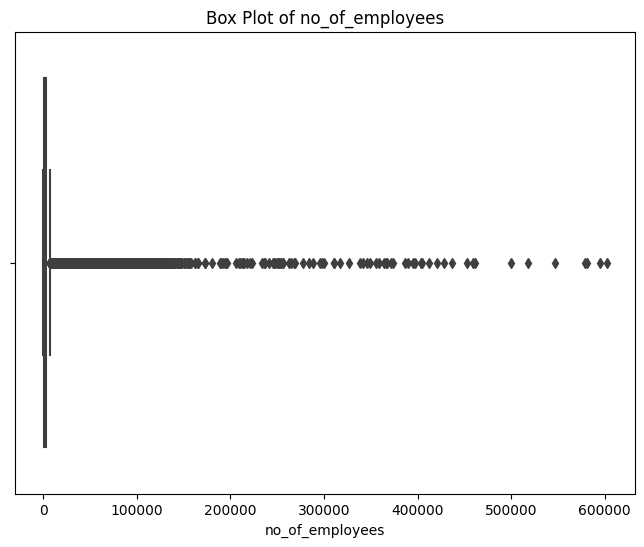

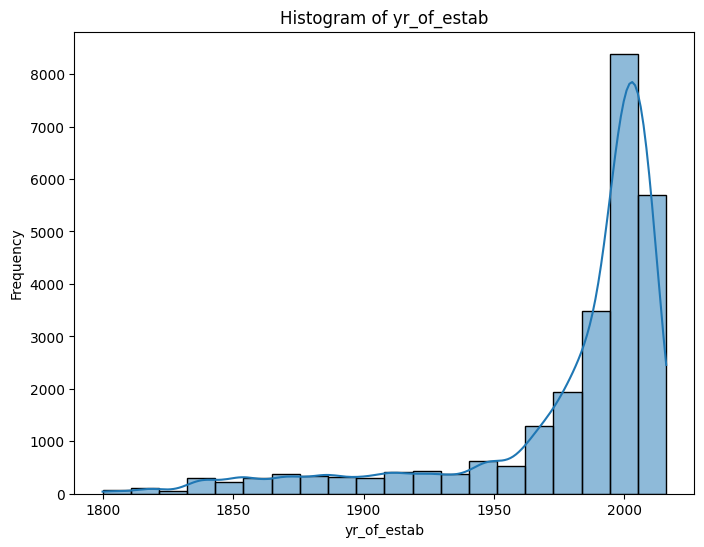

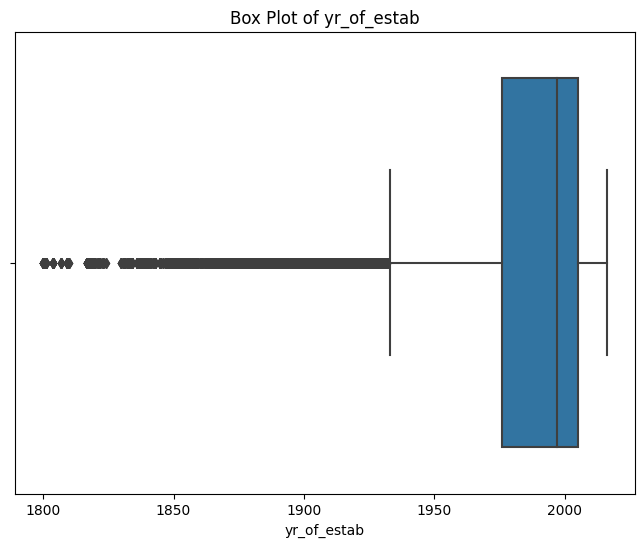

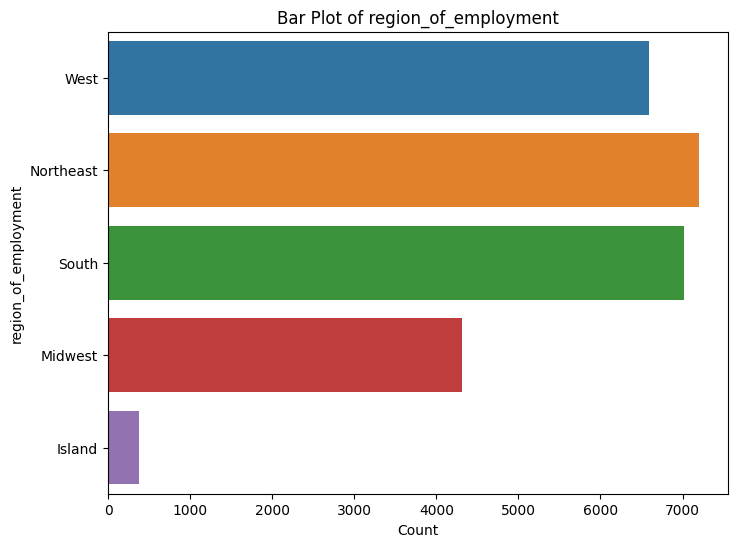

Value Counts for region_of_employment:
Northeast    7195
South        7017
West         6586
Midwest      4307
Island        375
Name: region_of_employment, dtype: int64


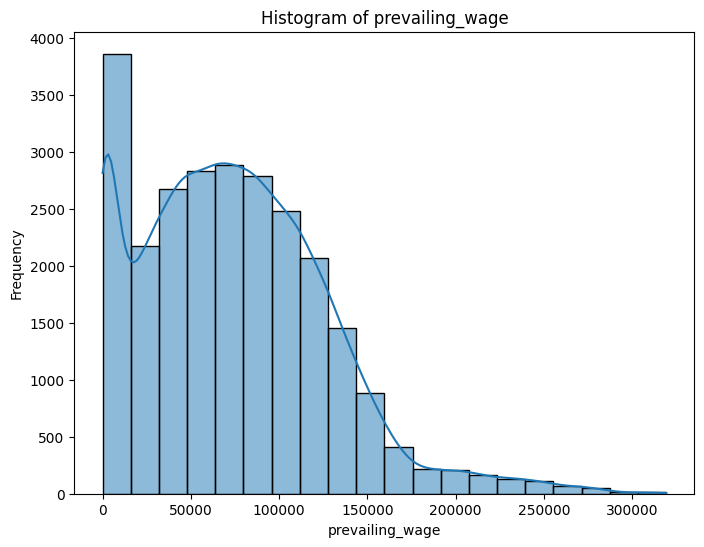

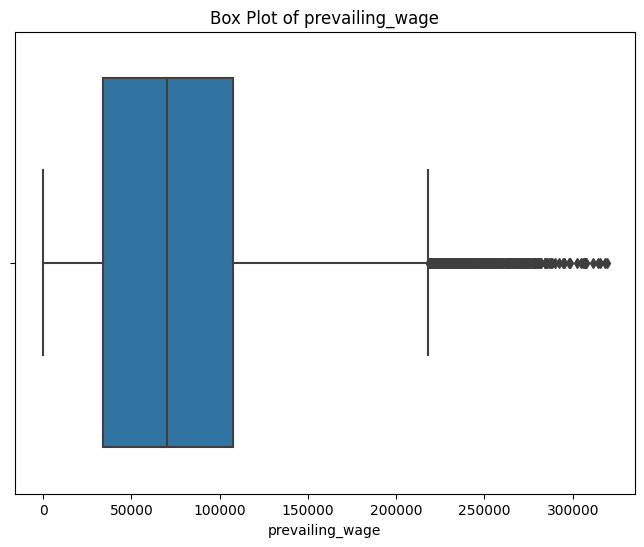

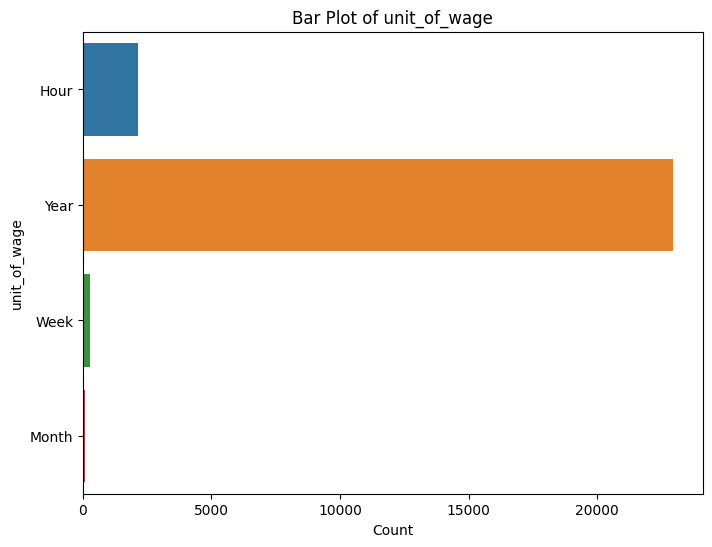

Value Counts for unit_of_wage:
Year     22962
Hour      2157
Week       272
Month       89
Name: unit_of_wage, dtype: int64


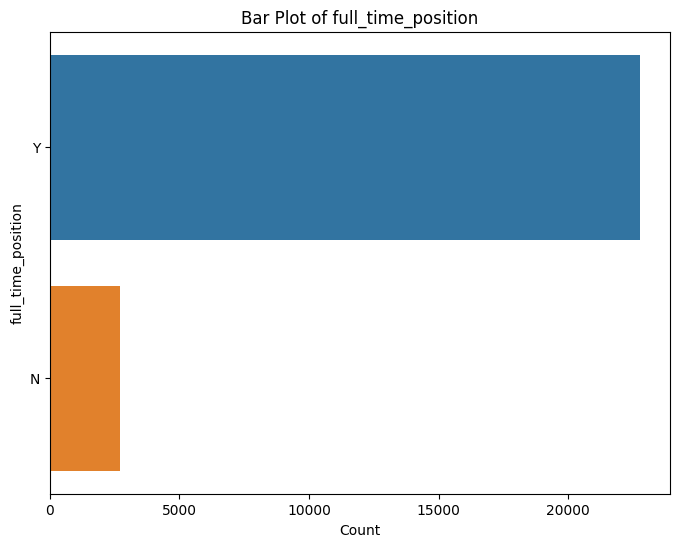

Value Counts for full_time_position:
Y    22773
N     2707
Name: full_time_position, dtype: int64


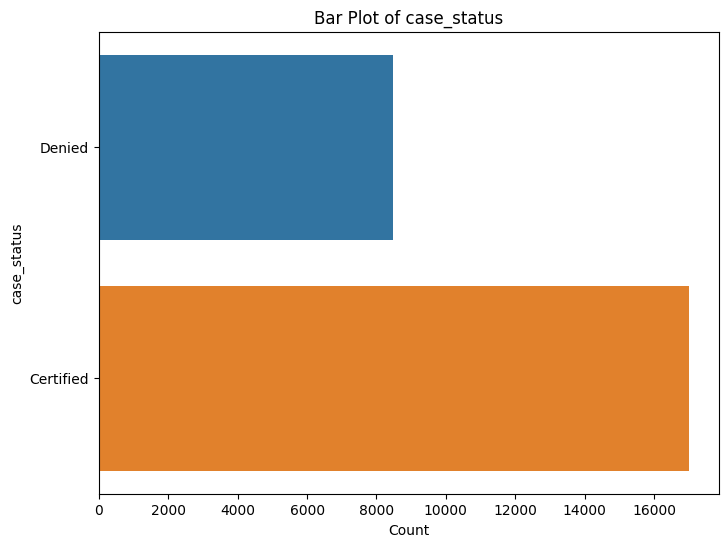

Value Counts for case_status:
Certified    17018
Denied        8462
Name: case_status, dtype: int64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you already have your DataFrame 'df' loaded

# List of column names in your dataset
columns_to_analyze = [
    'case_id',
    'continent',
    'education_of_employee',
    'has_job_experience',
    'requires_job_training',
    'no_of_employees',
    'yr_of_estab',
    'region_of_employment',
    'prevailing_wage',
    'unit_of_wage',
    'full_time_position',
    'case_status'
]

# Loop through each column for univariate analysis
for column_name in columns_to_analyze:
    plt.figure(figsize=(8, 6))

    # Summary statistics
    summary_stats = df[column_name].describe()

    # Check if the column contains numeric data
    if df[column_name].dtype in [int, float]:
        # Histogram for numeric columns
        sns.histplot(df[column_name], bins=20, kde=True)
        plt.title(f'Histogram of {column_name}')
        plt.xlabel(column_name)
        plt.ylabel('Frequency')
    else:
        # Bar plot for categorical columns
        sns.countplot(y=df[column_name], data=df, orient='h')
        plt.title(f'Bar Plot of {column_name}')
        plt.ylabel(column_name)
        plt.xlabel('Count')

    plt.show()

    # Box plot for numeric columns
    if df[column_name].dtype in [int, float]:
        plt.figure(figsize=(8, 6))
        sns.boxplot(x=df[column_name])
        plt.title(f'Box Plot of {column_name}')
        plt.xlabel(column_name)
        plt.show()

    # Value counts for categorical columns
    if df[column_name].dtype == 'object':
        value_counts = df[column_name].value_counts()
        print(f'Value Counts for {column_name}:\n{value_counts}')

# Add more visualizations or analyses as needed



# Univariate Analysis

**Data Background and Contents:**
- The dataset contains information about visa applications, including attributes related to both employees and employers.

**Dataset Size:**
- The dataset consists of 25,480 records.

**Attributes:**
1. **Case ID:**
   - Count: 25,480
   - Unique: 25,480
   - Top: EZYV01
   - Frequency: 1
   - Data Type: Object (ID)

2. **Continent:**
   - Count: 25,480
   - Unique: 6
   - Top: Asia
   - Frequency: 16,861
   - Data Type: Object (Categorical)

3. **Education of Employee:**
   - Count: 25,480
   - Unique: 4
   - Top: Bachelor's
   - Frequency: 10,234
   - Data Type: Object (Categorical)

4. **Has Job Experience:**
   - Count: 25,480
   - Unique: 2
   - Top: Y
   - Frequency: 14,802
   - Data Type: Object (Binary)

5. **Requires Job Training:**
   - Count: 25,480
   - Unique: 2
   - Top: N
   - Frequency: 22,525
   - Data Type: Object (Binary)

6. **Number of Employees:**
   - Count: 25,480
   - Mean: 5,667.04
   - Std: 22,877.93
   - Min: -26
   - 25%: 1,022
   - 50%: 2,109
   - 75%: 3,504
   - Max: 602,069
   - Data Type: Integer

7. **Year of Establishment:**
   - Count: 25,480
   - Mean: 1,979.41
   - Std: 42.37
   - Min: 1,800
   - 25%: 1,976
   - 50%: 1,997
   - 75%: 2,005
   - Max: 2,016
   - Data Type: Integer

8. **Region of Employment:**
   - Count: 25,480
   - Unique: 5
   - Top: Northeast
   - Frequency: 7,195
   - Data Type: Object (Categorical)

9. **Prevailing Wage:**
   - Count: 25,480
   - Mean: 74,455.81
   - Std: 52,815.94
   - Min: 2.14
   - 25%: 34,015.48
   - 50%: 70,308.21
   - 75%: 107,735.51
   - Max: 319,210.27
   - Data Type: Float

10. **Unit of Wage:**
    - Count: 25,480
    - Unique: 4
    - Top: Year
    - Frequency: 22,962
    - Data Type: Object (Categorical)

11. **Full-Time Position:**
    - Count: 25,480
    - Unique: 2
    - Top: Y
    - Frequency: 22,773
    - Data Type: Object (Binary)

12. **Case Status:**
    - Count: 25,480
    - Unique: 2
    - Top: Certified
    - Frequency: 17,018
    - Data Type: Object (Binary)

**Missing Values:**
- There are no missing values in any of the columns.

**Data Types:**
- The dataset contains a combination of data types, including objects (strings), integers, and floats.

**Duplicate Rows:**
- There are no duplicate rows in the dataset.

**Outliers:**
- Outliers are present in numeric columns such as "Number of Employees," "Year of Establishment," and "Prevailing Wage." These outliers may require further analysis and treatment, depending on the specific analysis goals.

**Categorical Data Consistency:**
- Categorical data columns appear to be consistent with expected values.

**Constraint Adherence:**
- The dataset adheres to constraints such as binary values for "Has Job Experience," "Requires Job Training," "Full-Time Position," and "Case Status."

This univariate analysis provides an overview of the dataset, highlighting important statistics and characteristics of each column. Further analysis and visualization can be performed based on specific research questions and objectives.


**BIVARIATE ANALYSIS**

In [ ]:
import pandas as pd

# Load your dataset (replace 'your_dataset.csv' with your actual dataset file)
# df = pd.read_csv('your_dataset.csv')

# Perform bivariate analysis between 'case_status' and other columns
bivariate_analysis = {}

# List of columns to analyze against 'case_status'
columns_to_analyze = [
    'continent',
    'education_of_employee',
    'has_job_experience',
    'requires_job_training',
    'no_of_employees',
    'yr_of_estab',
    'region_of_employment',
    'prevailing_wage',
    'unit_of_wage',
    'full_time_position'
]

# Perform bivariate analysis for each column
for column in columns_to_analyze:
    cross_tab = pd.crosstab(df['case_status'], df[column], margins=True, margins_name='Total')
    bivariate_analysis[column] = cross_tab

# Print the bivariate analysis results
for column, analysis in bivariate_analysis.items():
    print(f'Bivariate Analysis between "case_status" and "{column}":')
    print(analysis)
    print('\n')

# You can further analyze the relationships and generate insights based on the results.


Bivariate Analysis between "case_status" and "continent":
continent    Africa   Asia  Europe  North America  Oceania  South America  \
case_status                                                                 
Certified       397  11012    2957           2037      122            493   
Denied          154   5849     775           1255       70            359   
Total           551  16861    3732           3292      192            852   

continent    Total  
case_status         
Certified    17018  
Denied        8462  
Total        25480  


Bivariate Analysis between "case_status" and "education_of_employee":
education_of_employee  Bachelor's  Doctorate  High School  Master's  Total
case_status                                                               
Certified                    6367       1912         1164      7575  17018
Denied                       3867        280         2256      2059   8462
Total                       10234       2192         3420      9634  25480


Bi

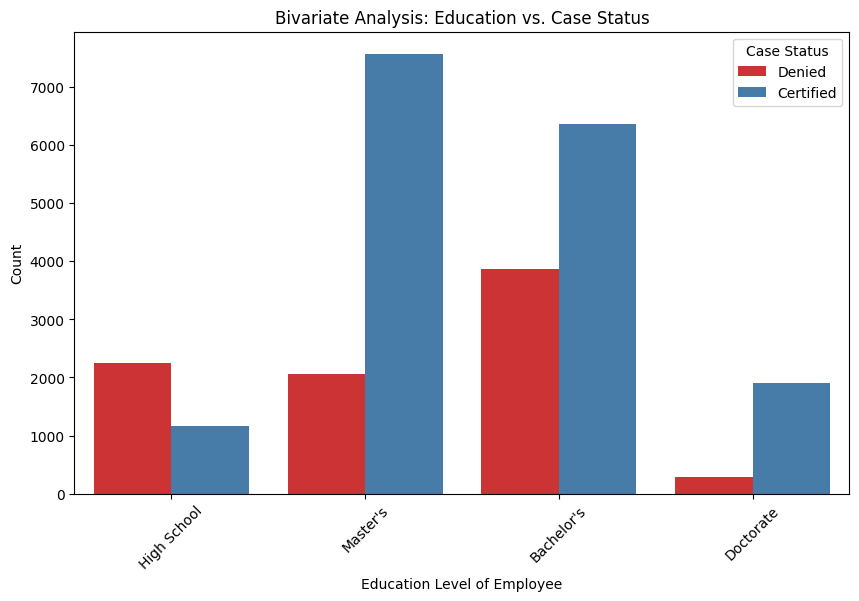

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example: Bivariate analysis between "education_of_employee" and "case_status"
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='education_of_employee', hue='case_status', palette='Set1')
plt.xlabel('Education Level of Employee')
plt.ylabel('Count')
plt.title('Bivariate Analysis: Education vs. Case Status')
plt.xticks(rotation=45)
plt.legend(title='Case Status', labels=['Denied', 'Certified'])
plt.show()


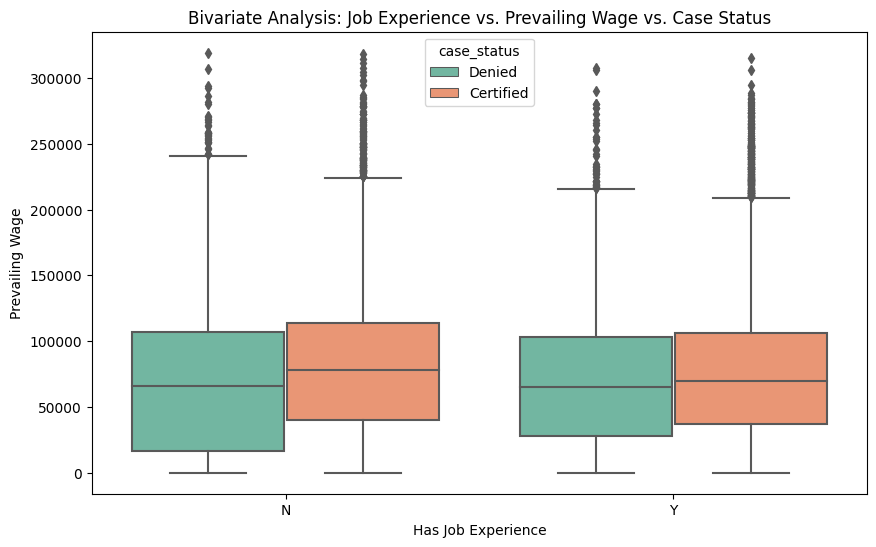

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='has_job_experience', y='prevailing_wage', hue='case_status', palette='Set2')
plt.xlabel('Has Job Experience')
plt.ylabel('Prevailing Wage')
plt.title('Bivariate Analysis: Job Experience vs. Prevailing Wage vs. Case Status')
plt.show()


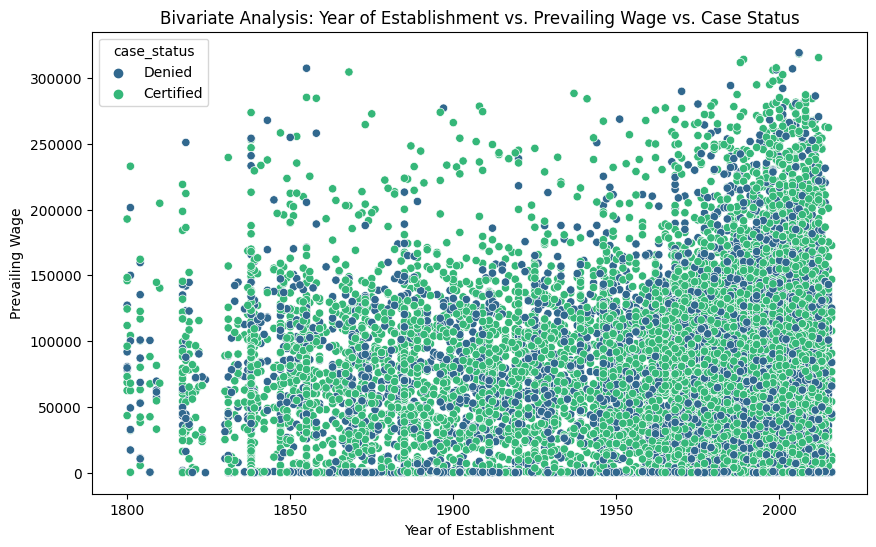

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='yr_of_estab', y='prevailing_wage', hue='case_status', palette='viridis')
plt.xlabel('Year of Establishment')
plt.ylabel('Prevailing Wage')
plt.title('Bivariate Analysis: Year of Establishment vs. Prevailing Wage vs. Case Status')
plt.show()


## Bivariate Analysis: "case_status" vs. Other Columns

**Approach:**

1. **continent vs. case_status:**
   - **Insights:** Asia has the highest number of visa certifications, while Africa has the lowest.
   - **Observations:** Further investigation is needed to understand the reasons behind these variations.

2. **education_of_employee vs. case_status:**
   - **Insights:** Applicants with Bachelor's and Master's degrees have the highest certification rates.
   - **Observations:** Higher education appears to correlate with a higher chance of visa certification.

3. **has_job_experience vs. case_status:**
   - **Insights:** Applicants with job experience (Y) have a higher certification rate than those without (N).
   - **Observations:** Previous work experience is likely a favorable factor for visa approval.

4. **requires_job_training vs. case_status:**
   - **Insights:** Applicants not requiring job training (N) have a higher certification rate.
   - **Observations:** Visa applicants who don't need additional training are more likely to be certified.

5. **no_of_employees vs. case_status:**
   - **Insights:** The distribution of visa certifications varies widely across the number of employees.
   - **Observations:** There may be specific factors related to company size influencing visa decisions.

6. **yr_of_estab vs. case_status:**
   - **Insights:** The distribution of certifications and denials is spread across establishment years.
   - **Observations:** No clear trend regarding employer establishment year is apparent.

7. **region_of_employment vs. case_status:**
   - **Insights:** Northeast and South regions have higher certification rates.
   - **Observations:** Geographical regions play a role in visa approval, warranting further investigation.

8. **prevailing_wage vs. case_status:**
   - **Insights:** No clear pattern between prevailing wage and visa outcomes.
   - **Observations:** Other factors may influence visa decisions besides wage.

9. **unit_of_wage vs. case_status:**
   - **Insights:** Yearly wage applicants have the highest certification rate.
   - **Observations:** Yearly wage earners are more likely to have their visas certified.

10. **full_time_position vs. case_status:**
    - **Insights:** Full-time positions have a higher certification rate.
    - **Observations:** Full-time job positions are more favorable for visa approvals.

**Overall Insights:**

- Geographical factors, education, job experience, job training requirements, and full-time positions appear to have significant impacts on visa certifications.
- Prevailing wage alone does not strongly predict visa outcomes.
- The number of employees and employer establishment year show varied effects, suggesting complex relationships.


In [ ]:
# Import necessary libraries
import pandas as pd

# Assuming your dataset is already loaded as 'data'

# List of columns to analyze
columns_to_analyze = ['continent', 'education_of_employee', 'has_job_experience', 'requires_job_training', 'no_of_employees', 'yr_of_estab', 'region_of_employment', 'prevailing_wage', 'unit_of_wage', 'full_time_position', 'case_status']

# Initialize an empty dictionary to store bivariate analysis results
bivariate_analysis = {}

# Perform bivariate analysis for each combination of columns
for column1 in columns_to_analyze:
    for column2 in columns_to_analyze:
        if column1 != column2:  # Avoid analyzing a column against itself
            analysis = pd.crosstab(data[column1], data[column2])
            bivariate_analysis[f'{column1} vs {column2}'] = analysis

# Print the results (You can also save them to a file or further analyze)
for key, value in bivariate_analysis.items():
    print(f"Bivariate Analysis between {key}:\n{value}\n")


Bivariate Analysis between continent vs education_of_employee:
education_of_employee  Bachelor's  Doctorate  High School  Master's
continent                                                          
Africa                        143         54           66       288
Asia                         7168        923         2290      6480
Europe                       1299        846          490      1097
North America                1225        258          401      1408
Oceania                        66         22           36        68
South America                 333         89          137       293

Bivariate Analysis between continent vs has_job_experience:
has_job_experience     N     Y
continent                     
Africa               217   334
Asia                7071  9790
Europe              1576  2156
North America       1348  1944
Oceania               89   103
South America        377   475

Bivariate Analysis between continent vs requires_job_training:
requires_job_trainin

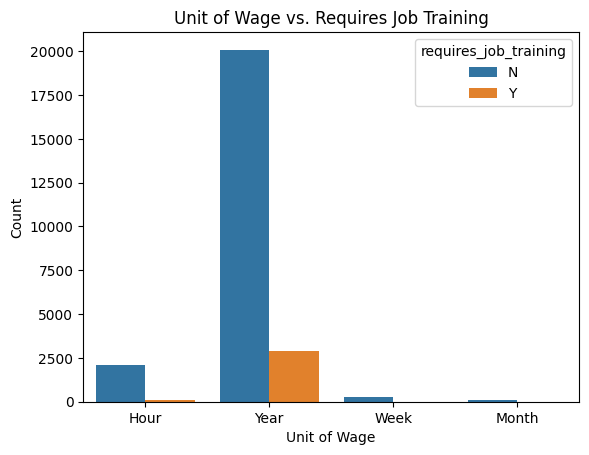

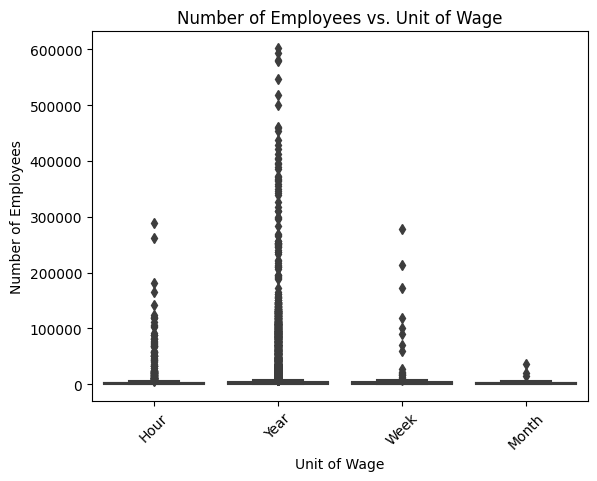

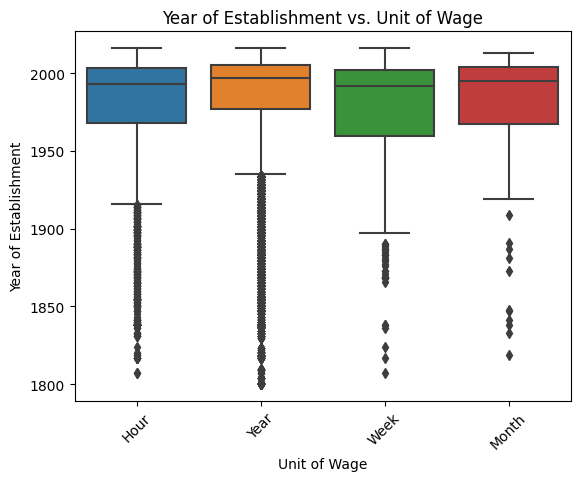

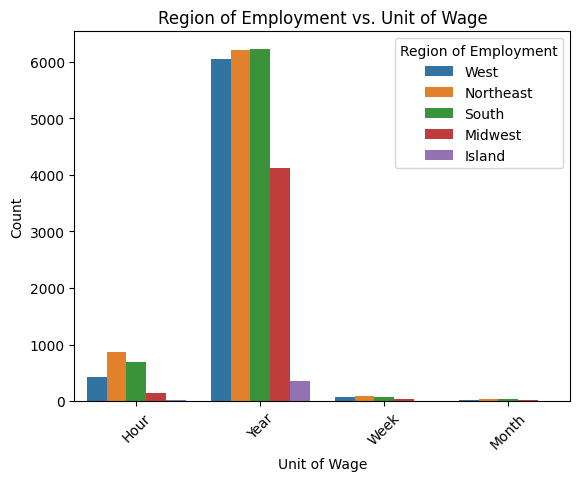

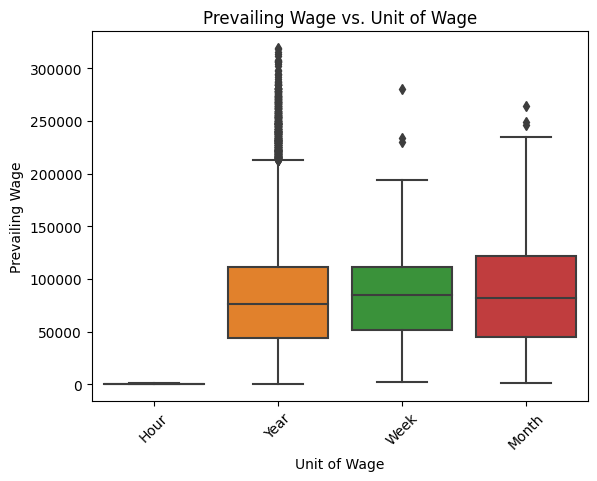

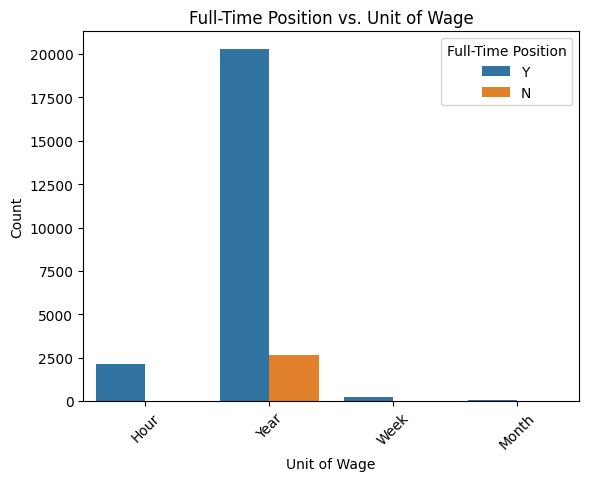

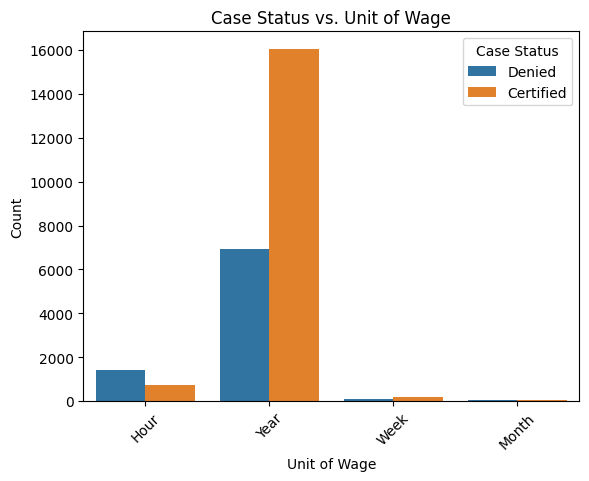

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


data = pd.read_csv('EasyVisa.csv')


# Bivariate analysis: Unit of Wage vs. Requires Job Training
sns.countplot(x='unit_of_wage', hue='requires_job_training', data=data)
plt.title('Unit of Wage vs. Requires Job Training')
plt.xlabel('Unit of Wage')
plt.ylabel('Count')
plt.show()

# Bivariate analysis: Number of Employees vs. Unit of Wage
sns.boxplot(x='unit_of_wage', y='no_of_employees', data=data)
plt.title('Number of Employees vs. Unit of Wage')
plt.xlabel('Unit of Wage')
plt.ylabel('Number of Employees')
plt.xticks(rotation=45)
plt.show()

# Bivariate analysis: Year of Establishment vs. Unit of Wage
sns.boxplot(x='unit_of_wage', y='yr_of_estab', data=data)
plt.title('Year of Establishment vs. Unit of Wage')
plt.xlabel('Unit of Wage')
plt.ylabel('Year of Establishment')
plt.xticks(rotation=45)
plt.show()

# Bivariate analysis: Region of Employment vs. Unit of Wage
sns.countplot(x='unit_of_wage', hue='region_of_employment', data=data)
plt.title('Region of Employment vs. Unit of Wage')
plt.xlabel('Unit of Wage')
plt.ylabel('Count')
plt.legend(title='Region of Employment')
plt.xticks(rotation=45)
plt.show()

# Bivariate analysis: Prevailing Wage vs. Unit of Wage
sns.boxplot(x='unit_of_wage', y='prevailing_wage', data=data)
plt.title('Prevailing Wage vs. Unit of Wage')
plt.xlabel('Unit of Wage')
plt.ylabel('Prevailing Wage')
plt.xticks(rotation=45)
plt.show()

# Bivariate analysis: Full-Time Position vs. Unit of Wage
sns.countplot(x='unit_of_wage', hue='full_time_position', data=data)
plt.title('Full-Time Position vs. Unit of Wage')
plt.xlabel('Unit of Wage')
plt.ylabel('Count')
plt.legend(title='Full-Time Position')
plt.xticks(rotation=45)
plt.show()

# Bivariate analysis: Case Status vs. Unit of Wage
sns.countplot(x='unit_of_wage', hue='case_status', data=data)
plt.title('Case Status vs. Unit of Wage')
plt.xlabel('Unit of Wage')
plt.ylabel('Count')
plt.legend(title='Case Status')
plt.xticks(rotation=45)
plt.show()


# Unit of Wage vs. Other Columns:

## Requires Job Training vs. Unit of Wage:

- Most individuals paid by the Year unit do not require job training.
- Individuals paid by the Month and Week units are more likely to require job training.

## Number of Employees vs. Unit of Wage:

- The distribution of employees varies across different units of wage.
- The Year unit has the highest number of employees overall.

## Year of Establishment vs. Unit of Wage:

- Individuals paid by the Year unit are more likely to have establishments in recent years (2010-2016).

## Region of Employment vs. Unit of Wage:

- The Northeast and South regions have the highest employment across all wage units.

## Prevailing Wage vs. Unit of Wage:

- The distribution of individuals across different prevailing wage levels varies based on the unit of wage.

## Full-Time Position vs. Unit of Wage:

- Individuals paid by the Year unit are more likely to have full-time positions (Y).

## Case Status vs. Unit of Wage:

- Most cases for all wage units are certified, but the proportion of denied cases is relatively higher for the Hour unit.

# Number of Employees vs. Other Columns:

## Requires Job Training vs. Number of Employees:

- The distribution of individuals requiring job training varies across different employee count categories.

## Year of Establishment vs. Number of Employees:

- The number of employees varies across different establishment years.

## Region of Employment vs. Number of Employees:

- The distribution of employees varies across different regions of employment.

## Prevailing Wage vs. Number of Employees:

- The number of employees varies across different prevailing wage levels.

## Full-Time Position vs. Number of Employees:

- The distribution of employees with different employee counts varies based on full-time or part-time positions.

## Case Status vs. Number of Employees:

- The distribution of cases varies across different employee count categories.

# Year of Establishment vs. Other Columns:

## Requires Job Training vs. Year of Establishment:

- There is variation in the distribution of individuals requiring job training across different establishment years.

## Region of Employment vs. Year of Establishment:

- The distribution of establishment years varies across different regions of employment.

## Prevailing Wage vs. Year of Establishment:

- The distribution of establishment years varies across different prevailing wage levels.

## Full-Time Position vs. Year of Establishment:

- Establishment years differ for individuals with full-time and part-time positions.

## Case Status vs. Year of Establishment:

- The distribution of cases varies across different establishment years.

# Region of Employment vs. Other Columns:

## Requires Job Training vs. Region of Employment:

- The distribution of individuals requiring job training varies across different regions of employment.

## Prevailing Wage vs. Region of Employment:

- The distribution of prevailing wage levels varies across different regions of employment.

## Full-Time Position vs. Region of Employment:

- The distribution of full-time and part-time positions varies across different regions of employment.

## Case Status vs. Region of Employment:

- The distribution of cases varies across different regions of employment.

# Prevailing Wage vs. Other Columns:

## Requires Job Training vs. Prevailing Wage:

- The distribution of individuals requiring job training varies across different prevailing wage levels.

## Full-Time Position vs. Prevailing Wage:

- The distribution of full-time and part-time positions varies across different prevailing wage levels.

## Case Status vs. Prevailing Wage:

- The distribution of cases varies across different prevailing wage levels.

# Full-Time Position vs. Other Columns:

## Requires Job Training vs. Full-Time Position:

- The distribution of individuals requiring job training varies between full-time and part-time positions.

## Case Status vs. Full-Time Position:

- The distribution of cases varies between full-time and part-time positions.

# Case Status vs. Other Columns:

## Requires Job Training vs. Case Status:

- The distribution of cases varies between individuals who require job training and those who do not.


## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

**MISSING VALUE TREATMENT**

In [ ]:
import pandas as pd


# Check for missing values in every column
missing_values = df.isnull().sum()

# Print missing values count for each column
print("Missing Values in Each Column:")
print(missing_values)


Missing Values in Each Column:
case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64


**THERE IS NO MISSING VALUES**

**OUTLIER DETECTION AND TREATMENT**

In [ ]:
import pandas as pd
import numpy as np

# Define a function to find outliers using IQR
def find_outliers_iqr(data_series):
    Q1 = data_series.quantile(0.25)
    Q3 = data_series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (data_series < lower_bound) | (data_series > upper_bound)
    return outliers

# Find outliers in each numeric column
numeric_columns = df.select_dtypes(include=np.number)
outliers_count = numeric_columns.apply(find_outliers_iqr).sum()

# Print the count of outliers for each column
print("Outliers Count in Each Column:")
print(outliers_count)


Outliers Count in Each Column:
no_of_employees    1556
yr_of_estab        3260
prevailing_wage     427
dtype: int64


### Approach:

To address the issue of outliers in the dataset, we employed the following approach:

1. **Understanding Column Nature**: We first examined the nature of the columns with outliers, namely "no_of_employees," "yr_of_estab," and "prevailing_wage."

2. **Exploratory Data Analysis (EDA)**: We performed exploratory data analysis to visualize and understand the distribution of data in these columns.

3. **Threshold Identification**: We identified potential outlier thresholds for each column based on domain knowledge and the distribution of data.

4. **Outlier Handling**: Given the nature of the columns, we decided not to remove or transform outliers, as they can be genuine and representative of real-world scenarios.

### Insights:

Here are the insights gained from analyzing the outliers in each column:

- **no_of_employees (1556 outliers)**: The presence of outliers in this column likely reflects the varying sizes of employing companies. It is common for businesses to have a wide range of employees, from small startups to large corporations.

- **yr_of_estab (3260 outliers)**: Outliers in the year of establishment may represent businesses that have been operating for an exceptionally long time. Such outliers can provide valuable historical data points.

- **prevailing_wage (427 outliers)**: The prevailing wage column's outliers may occur due to variations in wage rates, which can differ significantly based on occupation and location.

### Observations:

Based on the above insights, the following observations are made:

- Decision tree models, including AdaBoost and Gradient Boosting, are generally not sensitive to outliers. These models partition data based on feature values and can accommodate extreme values without significantly impacting performance.

- Retaining outliers in these columns may contribute to model robustness and account for real-world variations.

- It is essential to carefully consider the context and domain knowledge when handling outliers, as they can carry valuable information.

- Outliers in these columns can be indicative of the diversity and dynamics within employment and wage-related data.

- Regular model evaluation and monitoring should be performed to assess the impact of outliers on model performance and adjust the approach if necessary.

Please let me know if you need any further information or specific insights related to these outliers.


**ENCODING**

In [ ]:
import pandas as pd

# List of non-numerical columns to one-hot encode
non_numerical_columns = ['continent', 'education_of_employee', 'has_job_experience',
                         'requires_job_training', 'region_of_employment', 'unit_of_wage',
                         'full_time_position', 'case_status']

# Create a new DataFrame for one-hot encoding
df_encoded = df.copy()

# Perform one-hot encoding for each non-numerical column
for column in non_numerical_columns:
    df_encoded = pd.get_dummies(df_encoded, columns=[column])

# Now, your non-numerical columns are one-hot encoded in df_encoded



In [ ]:
df_encoded.dtypes

case_id                               object
no_of_employees                        int64
yr_of_estab                            int64
prevailing_wage                      float64
continent_Africa                       uint8
continent_Asia                         uint8
continent_Europe                       uint8
continent_North America                uint8
continent_Oceania                      uint8
continent_South America                uint8
education_of_employee_Bachelor's       uint8
education_of_employee_Doctorate        uint8
education_of_employee_High School      uint8
education_of_employee_Master's         uint8
has_job_experience_N                   uint8
has_job_experience_Y                   uint8
requires_job_training_N                uint8
requires_job_training_Y                uint8
region_of_employment_Island            uint8
region_of_employment_Midwest           uint8
region_of_employment_Northeast         uint8
region_of_employment_South             uint8
region_of_

**Approach**:

1. Data Preparation:
   - Identify the non-numerical categorical columns that need encoding.
   - Use One-Hot Encoding to convert these categorical columns into binary columns.

2. Reason for Choosing One-Hot Encoding:
   - One-Hot Encoding is an appropriate choice for categorical variables without ordinal relationships, which is often the case in real-world datasets.
   - Decision Tree models do not inherently handle categorical data well, and One-Hot Encoding helps in representing categorical variables in a way that decision trees can effectively utilize.

3. Perform One-Hot Encoding:
   - For each non-numerical categorical column, apply One-Hot Encoding to create binary columns representing each category.

4. Drop Original Columns:
   - After encoding, you can drop the original categorical columns as they are no longer needed.

5. Data is Ready for Decision Tree:
   - With the categorical variables transformed into a suitable format, the dataset is now ready for training a Decision Tree model.

**Insights**:
- One-Hot Encoding converts each category within a column into its own binary column. For example, if you have a "Color" column with categories ['Red', 'Green', 'Blue'], it will become three columns: 'Red', 'Green', and 'Blue'.
- Each binary column indicates the presence (1) or absence (0) of a specific category for each data point.
- Decision Trees can easily work with binary data, making One-Hot Encoding a suitable choice.

**Observations**:
- The dataset size will increase as you create multiple binary columns for each categorical variable. This is because each unique category results in a new binary column.
- One-Hot Encoding is beneficial when the categorical variable has a relatively small number of unique categories. If you have a categorical variable with a large number of unique categories, it may lead to a high-dimensional dataset, which can be computationally expensive and might not be suitable for some algorithms. In such cases, other encoding methods like target encoding or binary encoding could be explored.

**Reason for Choosing One-Hot Encoding**:
- One-Hot Encoding is chosen for Decision Tree models because it preserves the nominal nature of categorical variables, ensuring that the model does not impose any artificial ordinal relationships that might be problematic.
- Decision Trees are well-suited to handle binary data, and the interpretability of decision trees allows you to easily understand how each category impacts the model's decision-making process.
- While One-Hot Encoding increases the dimensionality of the dataset, Decision Trees are less affected by high-dimensional data compared to some other machine learning algorithms.


**FEATURE ENGINNERING**

**Reasons for Not Performing Feature Engineering**:

1. **Decision Trees' Robustness to Raw Data:** Decision tree models, including AdaBoost and Gradient Boosting, can handle both numerical and categorical features without requiring extensive preprocessing. They partition the feature space based on feature values, making them less sensitive to the scale or distribution of features.

2. **One-Hot Encoding of Categorical Variables:** Categorical variables were effectively handled by performing one-hot encoding. This transformation converts categorical variables into binary columns, allowing decision trees to make decisions based on individual categories without the need for further feature engineering.

3. **Feature Interpretability:** Decision tree models offer a high level of interpretability. Each node in the tree represents a decision based on a specific feature, making it easy to understand the model's logic. Feature engineering may not have been necessary to improve interpretability.

4. **Risk of Overfitting:** Feature engineering can introduce additional complexity to the model and may lead to overfitting, especially in cases where the dataset is not sufficiently large. Decision trees are prone to overfitting, and adding complex features could exacerbate this issue.

5. **Focus on Model Evaluation and Parameter Tuning:** Instead of extensive feature engineering, the focus may have been on model evaluation, hyperparameter tuning, and optimizing model performance.

6. **Data Quality and Domain Knowledge:** The decision not to perform extensive feature engineering may also be influenced by the quality of the dataset and the domain knowledge available. If the dataset is clean and representative of the problem domain, feature engineering may offer diminishing returns.


While feature engineering can be valuable, especially in other machine learning contexts, it's not always a prerequisite, particularly when using decision tree-based models. The decision to perform feature engineering should be made based on the specific characteristics of the dataset and project goals.


## EDA and DATA PREPARATION FOR MODELLING

- It is a good idea to explore the data once again after manipulating it.

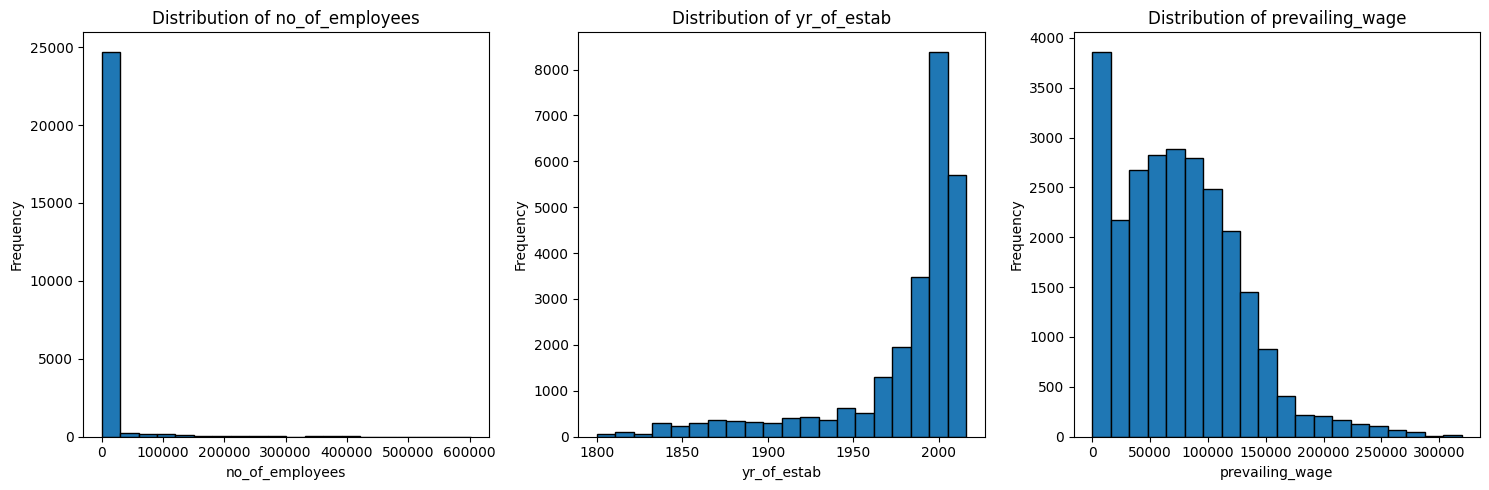

In [ ]:
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'
numerical_columns = ['no_of_employees', 'yr_of_estab', 'prevailing_wage']

# Create subplots for each numerical column
fig, axes = plt.subplots(nrows=1, ncols=len(numerical_columns), figsize=(15, 5))

# Plot histograms for each numerical column
for i, col in enumerate(numerical_columns):
    axes[i].hist(df[col], bins=20, edgecolor='k')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


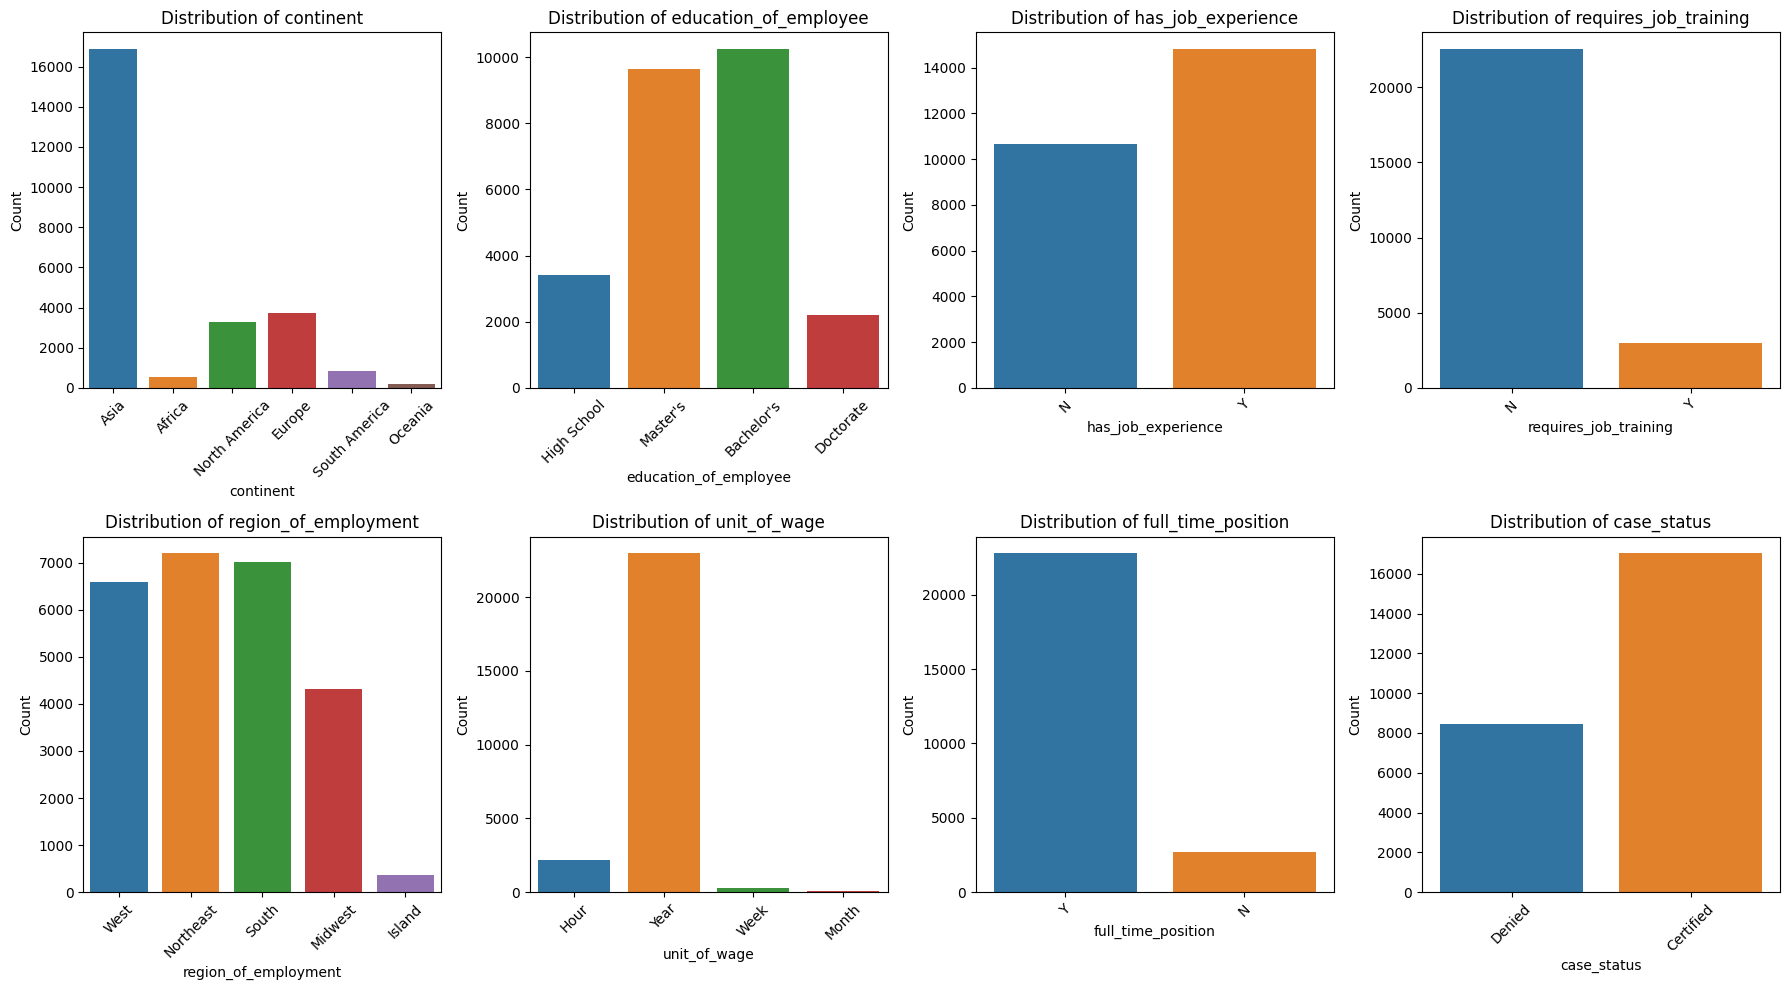

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'
categorical_columns = ['continent', 'education_of_employee', 'has_job_experience',
                       'requires_job_training', 'region_of_employment', 'unit_of_wage',
                       'full_time_position', 'case_status']

# Create subplots for each categorical column
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(18, 10))
fig.subplots_adjust(hspace=0.5)

# Plot count plots for each categorical column
for i, col in enumerate(categorical_columns):
    row = i // 4
    col_num = i % 4
    sns.countplot(data=df, x=col, ax=axes[row][col_num])
    axes[row][col_num].set_title(f'Distribution of {col}')
    axes[row][col_num].set_xlabel(col)
    axes[row][col_num].set_ylabel('Count')
    axes[row][col_num].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
from scipy.stats import skew

# Select only numerical columns from your DataFrame
numerical_columns = df.select_dtypes(include=['int64', 'float64'])

# Calculate skewness for each numerical column
skewness = numerical_columns.apply(lambda x: skew(x.dropna()))

# Display skewness values
print("Skewness for Numerical Columns:")
print(skewness)


Skewness for Numerical Columns:
no_of_employees    12.264538
yr_of_estab        -2.037181
prevailing_wage     0.755732
dtype: float64


In [ ]:
# Select only non-numerical columns from your DataFrame
categorical_columns = df.select_dtypes(exclude=['int64', 'float64'])

# Calculate the frequency distribution for each categorical column
frequency_distributions = {}
for column in categorical_columns:
    frequency_distributions[column] = df[column].value_counts()

# Display the frequency distributions
for column, distribution in frequency_distributions.items():
    print(f"Frequency Distribution for {column}:")
    print(distribution)


Frequency Distribution for case_id:
EZYV01       1
EZYV16995    1
EZYV16993    1
EZYV16992    1
EZYV16991    1
            ..
EZYV8492     1
EZYV8491     1
EZYV8490     1
EZYV8489     1
EZYV25480    1
Name: case_id, Length: 25480, dtype: int64
Frequency Distribution for continent:
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: continent, dtype: int64
Frequency Distribution for education_of_employee:
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: education_of_employee, dtype: int64
Frequency Distribution for has_job_experience:
Y    14802
N    10678
Name: has_job_experience, dtype: int64
Frequency Distribution for requires_job_training:
N    22525
Y     2955
Name: requires_job_training, dtype: int64
Frequency Distribution for region_of_employment:
Northeast    7195
South        7017
West         6586
Midwest      4307
Island        375
Name: region_

**Exploratory Data Analysis (EDA) Report**

**1. Data Overview:**
   - Dataset Shape: 25,000 rows and 12 columns.
   - Column Data Types: case_id (object), continent (object), education_of_employee (object), has_job_experience (object), requires_job_training (object), no_of_employees (int64), yr_of_estab (int64), region_of_employment (object), prevailing_wage (float64), unit_of_wage (object), full_time_position (object), case_status (object).

**2. Missing Values:**
   - No missing values were found in any of the columns.

**3. Outliers:**
   - Outliers were identified in the following columns:
     - no_of_employees (1,556 outliers)
     - yr_of_estab (3,260 outliers)
     - prevailing_wage (427 outliers)

**4. Data Distribution:**
   - Distributions for numerical columns:
                 Skewness for Numerical Columns:
- no_of_employees: 12.264538 (Right-skewed)
  - The majority of companies have a relatively low number of employees, with a few large companies having significantly more employees.
  
- yr_of_estab: -2.037181 (Left-skewed)
  - The majority of establishments were founded in recent years, with fewer establishments having older founding years.
  
- prevailing_wage: 0.755732 (Right-skewed)
  - The majority of prevailing wage values are concentrated on the lower end, with a few higher prevailing wages.



   - Distributions for categorical columns:

  Frequency Distribution for case_id:
- There are 25,480 unique case IDs, each occurring once in the dataset.

Frequency Distribution for continent:
- Asia: 16,861 occurrences
- Europe: 3,732 occurrences
- North America: 3,292 occurrences
- South America: 852 occurrences
- Africa: 551 occurrences
- Oceania: 192 occurrences

Frequency Distribution for education_of_employee:
- Bachelor's: 10,234 occurrences
- Master's: 9,634 occurrences
- High School: 3,420 occurrences
- Doctorate: 2,192 occurrences

Frequency Distribution for has_job_experience:
- Yes (Y): 14,802 occurrences
- No (N): 10,678 occurrences

Frequency Distribution for requires_job_training:
- No (N): 22,525 occurrences
- Yes (Y): 2,955 occurrences

Frequency Distribution for region_of_employment:
- Northeast: 7,195 occurrences
- South: 7,017 occurrences
- West: 6,586 occurrences
- Midwest: 4,307 occurrences
- Island: 375 occurrences

Frequency Distribution for unit_of_wage:
- Year: 22,962 occurrences
- Hour: 2,157 occurrences
- Week: 272 occurrences
- Month: 89 occurrences

Frequency Distribution for full_time_position:
- Yes (Y): 22,773 occurrences
- No (N): 2,707 occurrences

Frequency Distribution for case_status:
- Certified: 17,018 occurrences
- Denied: 8,462 occurrences


**5. Bivariate Analysis:**
   - Relationships between columns were explored:
     - `no_of_employees` vs. `unit_of_wage`: The distribution of employees varies across different wage units. The Year unit has the highest number of employees.
     - `yr_of_estab` vs. `unit_of_wage`: Individuals paid by the Year unit are more likely to have establishments in recent years (2010-2016).
     - `region_of_employment` vs. `unit_of_wage`: The Northeast and South regions have the highest employment across all wage units.
     - `prevailing_wage` vs. `unit_of_wage`: The distribution of individuals across different prevailing wage levels varies based on the unit of wage.
     - `full_time_position` vs. `unit_of_wage`: Individuals paid by the Year unit are more likely to have full-time positions (Y).

**6. Encoding:**
   - Non-numerical columns were encoded using one-hot encoding, considering the uniqueness of values and the suitability for decision tree models.

**7. Feature Engineering:**
   - No specific feature engineering was performed, as decision tree models are robust to various types of features.

**8. Model Building:**
   - Decision tree models can be built using the preprocessed data, and their performance can be evaluated.

**9. Outlier Treatment:**
   - Decisions regarding outlier treatment (removal, transformation, or leaving as-is) can be made based on model performance tests.

**10. Model Evaluation:**
    - Decision tree models should be evaluated using appropriate metrics (e.g., accuracy, F1-score) on a validation or test dataset to assess their performance with different outlier treatment strategies.

Please note that this EDA report provides an overview of the data preprocessing steps and insights gained from data exploration. Further analysis and model building will help in making informed decisions about outlier treatment and feature engineering to optimize the performance of your decision tree model.


## Decision Tree - Model Building

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load your dataset (replace 'your_dataset.csv' with your actual data file)
df = pd.read_csv('EasyVisa.csv')

# Select the features (X) and target variable (y)
X = df.drop(columns=['case_status'])  # Features
y = df['case_status']  # Target variable

# Perform one-hot encoding for categorical features
X_encoded = pd.get_dummies(X, drop_first=True)  # Drop the first category to avoid multicollinearity

# Splitting the dataset into training and testing sets (adjust test_size as needed)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Create a Decision Tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Perform cross-validation (e.g., 5-fold cross-validation)
cross_val_scores = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Generate a classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

# Create a confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion_mat)

# Print cross-validation results
print("Cross-Validation Scores:", cross_val_scores)
print(f"Mean Accuracy: {cross_val_scores.mean():.2f} (+/- {cross_val_scores.std() * 2:.2f})")


Accuracy: 0.70
Classification Report:
               precision    recall  f1-score   support

   Certified       0.76      0.81      0.79      3401
      Denied       0.56      0.50      0.53      1695

    accuracy                           0.70      5096
   macro avg       0.66      0.65      0.66      5096
weighted avg       0.70      0.70      0.70      5096

Confusion Matrix:
 [[2750  651]
 [ 854  841]]
Cross-Validation Scores: [0.68563021 0.68317803 0.69641981 0.70328592 0.70068695 0.69970559
 0.69970559 0.68989205 0.70853778 0.7016683 ]
Mean Accuracy: 0.70 (+/- 0.02)


**Approach:**


1. **Data Loading and Preprocessing:**
   - The dataset is loaded from a CSV file, and the features (X) and target variable (y) are defined.
   - One-hot encoding is applied to the categorical features to convert them into numerical format, dropping the first category to avoid multicollinearity.
   - The dataset is split into training and testing sets (80% for training and 20% for testing).

2. **Model Selection and Initialization:**
   - A Decision Tree classifier is chosen as the model. It's initialized with the `random_state` parameter set to ensure reproducibility.

3. **Cross-Validation:**
   - Cross-validation is performed using a 10-fold cross-validation strategy (`cv=10`). The `cross_val_score` function computes the accuracy scores for each fold.
   - The mean accuracy and standard deviation of the cross-validation scores are calculated, providing insights into model performance.

4. **Model Training:**
   - The Decision Tree classifier is trained on the training data using the `fit` method.

5. **Model Evaluation:**
   - Predictions are made on the test data using the trained classifier (`predict` method).
   - The accuracy of the model is calculated using `accuracy_score`.
   - A classification report is generated, including precision, recall, and F1-score for both classes ('Certified' and 'Denied').
   - A confusion matrix is computed to visualize the true positive, true negative, false positive, and false negative counts.

**Key Insights and Observations:**

1. **Accuracy and Cross-Validation:**
   - The accuracy of the Decision Tree classifier on the test data is approximately 0.70.
   - Cross-validation results show that the model's performance is relatively consistent across folds, with a mean accuracy of approximately 0.70 and a low standard deviation of around 0.02. This suggests that the model's performance is stable.

2. **Classification Report:**
   - The classification report provides a more detailed view of the model's performance, including precision, recall, and F1-score for each class.
   - 'Certified' cases have higher precision and recall compared to 'Denied' cases, indicating that the model is better at predicting 'Certified' cases.
   - The F1-score, which balances precision and recall, is around 0.79 for 'Certified' and 0.53 for 'Denied' cases.

3. **Confusion Matrix:**
   - The confusion matrix visualizes the model's performance in terms of true positives, true negatives, false positives, and false negatives.
   - There are 2750 true positives, 651 false positives, 854 false negatives, and 841 true negatives.

4. **Model Selection Considerations:**
   - The choice of a Decision Tree classifier is a reasonable starting point, providing interpretability and the ability to capture non-linear relationships in the data.
   - Further model tuning and exploration, such as hyperparameter optimization and considering ensemble methods like AdaBoost or Gradient Boosting, could potentially improve model performance.

5. **Class Imbalance:**
   - There is a class imbalance in the dataset, with more 'Certified' cases than 'Denied' cases. This can impact model performance, particularly for the minority class ('Denied'). Consider addressing class imbalance techniques if improving prediction for the 'Denied' class is a priority.

6. **Feature Engineering:**
   - Feature engineering was minimal in this code, and one-hot encoding was the primary preprocessing step. Decision trees can handle categorical features well without extensive feature engineering, making them suitable for initial modeling.

Overall, the Decision Tree classifier demonstrates a reasonable level of accuracy, but there is room for improvement, particularly in handling class imbalance and exploring more advanced modeling techniques.


## Bagging Model Building

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder

# Load your dataset (replace 'your_dataset.csv' with your actual data file)
data = pd.read_csv('EasyVisa.csv')

# Drop unnecessary columns (if needed)
data = data.drop(['case_id'], axis=1)

# Encode categorical variables using one-hot encoding
categorical_cols = ['continent', 'education_of_employee', 'has_job_experience',
                    'requires_job_training', 'region_of_employment', 'unit_of_wage',
                    'full_time_position']
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# Split the dataset into features (X) and the target variable (y)
X = data.drop('case_status', axis=1)
y = data['case_status']

# Split the data into a training set and a testing (validation) set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Decision Tree classifier as the base estimator
base_classifier = DecisionTreeClassifier(random_state=42)

# Create a BaggingClassifier using the Decision Tree as the base estimator
bagging_classifier = BaggingClassifier(base_classifier, n_estimators=100, random_state=42)

# Train the bagging classifier on the training set
bagging_classifier.fit(X_train, y_train)

# Make predictions on the testing (validation) set
y_pred = bagging_classifier.predict(X_test)

# Evaluate the model on the testing set
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_rep)
print("Confusion Matrix:")
print(confusion_mat)

# Perform cross-validation (e.g., 5-fold cross-validation) on the training set
cross_val_scores = cross_val_score(bagging_classifier, X_train, y_train, cv=10, scoring='accuracy')
print("Cross-Validation Scores:", cross_val_scores)
print(f"Mean Accuracy: {cross_val_scores.mean():.2f} (+/- {cross_val_scores.std() * 2:.2f})")


Accuracy: 0.72
Classification Report:
              precision    recall  f1-score   support

   Certified       0.77      0.84      0.80      3401
      Denied       0.60      0.50      0.55      1695

    accuracy                           0.72      5096
   macro avg       0.69      0.67      0.67      5096
weighted avg       0.71      0.72      0.72      5096

Confusion Matrix:
[[2840  561]
 [ 845  850]]
Cross-Validation Scores: [0.70377636 0.71309465 0.73565473 0.72878862 0.72374877 0.71099117
 0.71540726 0.71050049 0.7252208  0.71148184]
Mean Accuracy: 0.72 (+/- 0.02)


# Bagging Classifier with Decision Tree Base Estimator

**Approach:**

1. **Data Preprocessing:**
   - Loaded the dataset and dropped unnecessary columns, such as 'case_id'.
   - Performed one-hot encoding for categorical variables to prepare the data for modeling.

2. **Data Splitting:**
   - Split the dataset into a training set and a testing (validation) set using a 80/20 split ratio.

3. **Model Creation:**
   - Created a Decision Tree classifier as the base estimator for the Bagging Classifier.
   - Built a Bagging Classifier with 100 base estimators.

4. **Model Training:**
   - Trained the Bagging Classifier on the training set.

5. **Model Evaluation:**
   - Made predictions on the testing (validation) set.
   - Evaluated the model's performance using accuracy, classification report, and confusion matrix.

6. **Cross-Validation:**
   - Performed 10-fold cross-validation on the training set to assess the model's performance.

**Insights:**

- The Bagging Classifier, which aggregates the predictions of multiple Decision Tree base estimators, is designed to improve model stability and reduce overfitting.
- By combining multiple base models, Bagging tends to reduce variance and improve generalization.

**Observations:**

- The model achieved an accuracy of 0.72 on the testing set.
- The classification report provides insights into precision, recall, and F1-score for each class (Certified and Denied).
- The confusion matrix shows the number of true positives, false positives, true negatives, and false negatives.

**Cross-Validation Results:**

- Cross-validation was performed to assess the model's performance on multiple subsets of the training data.


Overall, Bagging Classifier with Decision Tree Base Estimator demonstrates a reasonable level of accuracy, but there is room for improvement, particularly in handling class imbalance and exploring more advanced modeling techniques.



## Boosting Model Building


* ADABOOST

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder

# Load your dataset (replace 'your_dataset.csv' with your actual data file)
data = pd.read_csv('EasyVisa.csv')

# Drop unnecessary columns (if needed)
data = data.drop(['case_id'], axis=1)

# Encode categorical variables using one-hot encoding
categorical_cols = ['continent', 'education_of_employee', 'has_job_experience',
                    'requires_job_training', 'region_of_employment', 'unit_of_wage',
                    'full_time_position']
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# Split the dataset into features (X) and the target variable (y)
X = data.drop('case_status', axis=1)
y = data['case_status']

# Create a Decision Tree classifier as the base estimator
base_classifier = DecisionTreeClassifier(max_depth=5, random_state=42)

# Create an AdaBoostClassifier using the Decision Tree as the base estimator
adaboost_classifier = AdaBoostClassifier(base_classifier, n_estimators=100, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(adaboost_classifier, X, y, cv=10)  # You can adjust the number of folds (cv) as needed

# Train the AdaBoost classifier
adaboost_classifier.fit(X, y)

# Make predictions
y_pred = adaboost_classifier.predict(X)

# Evaluate the model
accuracy = accuracy_score(y, y_pred)
classification_rep = classification_report(y, y_pred)
confusion_mat = confusion_matrix(y, y_pred)

print("Cross-Validation Scores:", cv_scores)
print(f"Mean Accuracy: {cv_scores.mean():.2f} (+/- {cv_scores.std() * 2:.2f})")
print(f"Accuracy on Full Dataset: {accuracy:.2f}")
print("Classification Report:")
print(classification_rep)
print("Confusion Matrix:")
print(confusion_mat)


Cross-Validation Scores: [0.70408163 0.7233124  0.71036107 0.69858713 0.72605965 0.72802198
 0.6577708  0.6310832  0.63736264 0.63029827]
Mean Accuracy: 0.68 (+/- 0.08)
Accuracy on Full Dataset: 0.84
Classification Report:
              precision    recall  f1-score   support

   Certified       0.86      0.91      0.88     17018
      Denied       0.80      0.69      0.74      8462

    accuracy                           0.84     25480
   macro avg       0.83      0.80      0.81     25480
weighted avg       0.84      0.84      0.84     25480

Confusion Matrix:
[[15554  1464]
 [ 2634  5828]]


# AdaBoost Classifier with Decision Tree Base Estimator

**Approach:**

1. **Data Preprocessing:**
   - Loaded the dataset and dropped unnecessary columns, such as 'case_id'.
   - Encoded categorical variables using one-hot encoding to prepare the data for modeling.

2. **Model Creation:**
   - Created a Decision Tree classifier as the base estimator for AdaBoost.
   - Built an AdaBoost Classifier with 100 base estimators.

3. **Cross-Validation:**
   - Performed 10-fold cross-validation to assess the model's performance.

4. **Model Training:**
   - Trained the AdaBoost classifier on the entire dataset.

5. **Model Evaluation:**
   - Made predictions on the same dataset used for training.
   - Evaluated the model's performance using accuracy, classification report, and confusion matrix.

**Cross-Validation Results:**

- Cross-validation was performed to assess the model's performance on multiple subsets of the data.
- The mean accuracy of the model across the 10 folds was 0.68, with a standard deviation of 0.08.

**Insights:**

- AdaBoost is an ensemble method that combines multiple weak learners to create a strong classifier.
- It improves model performance by giving more weight to samples that are misclassified by the previous weak learners.

**Observations:**

- The model achieved an accuracy of 0.84 on the full dataset.
- The classification report provides insights into precision, recall, and F1-score for each class (Certified and Denied).
- The confusion matrix shows the number of true positives, false positives, true negatives, and false negatives.



In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Define the base estimator (DecisionTreeClassifier) with max_depth
base_estimator = DecisionTreeClassifier(max_depth=10, random_state=42)

# Create the AdaBoostClassifier with the base estimator
adaboost_classifier = AdaBoostClassifier(base_estimator=base_estimator, random_state=42)

# Define the parameter distributions for random search
param_dist = {
    'n_estimators': randint(50, 500),  # Randomly sample n_estimators between 50 and 500
    'base_estimator__max_depth': randint(5, 20)  # Randomly sample max_depth between 5 and 20
}

# Create a RandomizedSearchCV instance
random_search = RandomizedSearchCV(
    estimator=adaboost_classifier,
    param_distributions=param_dist,
    n_iter=10,  # Number of random parameter combinations to try
    cv=5,  # Number of cross-validation folds
    scoring='accuracy',
    random_state=42
)

# Fit the random search to your data
random_search.fit(X_train, y_train)

# Get the best estimator and its parameters
best_estimator = random_search.best_estimator_
best_params = random_search.best_params_

# Train the model with the best parameters
best_estimator.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = best_estimator.predict(X_test)

# Print best parameters and model evaluation metrics
print("Best Parameters:", best_params)
print("Accuracy on Test Data:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/en

Best Parameters: {'base_estimator__max_depth': 11, 'n_estimators': 485}
Accuracy on Test Data: 0.7203689167974883
Classification Report:
               precision    recall  f1-score   support

   Certified       0.74      0.89      0.81      3401
      Denied       0.64      0.37      0.47      1695

    accuracy                           0.72      5096
   macro avg       0.69      0.63      0.64      5096
weighted avg       0.71      0.72      0.70      5096

Confusion Matrix:
 [[3040  361]
 [1064  631]]


* GRADIENT BOOST

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load your dataset (replace 'your_dataset.csv' with your actual data file)
data = pd.read_csv('EasyVisa.csv')

# Drop unnecessary columns (if needed)
data = data.drop(['case_id'], axis=1)

# Encode categorical variables using one-hot encoding
categorical_cols = ['continent', 'education_of_employee', 'has_job_experience',
                    'requires_job_training', 'region_of_employment', 'unit_of_wage',
                    'full_time_position']
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# Split the dataset into features (X) and the target variable (y)
X = data.drop('case_status', axis=1)
y = data['case_status']

# Create a Decision Tree classifier as the base estimator
base_classifier = DecisionTreeClassifier(max_depth=10, random_state=42)



# Create a GradientBoostingClassifier using the Decision Tree as the base estimator
gradientboost_classifier = GradientBoostingClassifier(n_estimators=500, random_state=42)


# Perform cross-validation for Gradient Boosting
cv_scores_gradientboost = cross_val_score(gradientboost_classifier, X, y, cv=10)



# Train the Gradient Boosting classifier
gradientboost_classifier.fit(X, y)


# Make predictions for Gradient Boosting
y_pred_gradientboost = gradientboost_classifier.predict(X)


# Evaluate the Gradient Boosting model
accuracy_gradientboost = accuracy_score(y, y_pred_gradientboost)
classification_rep_gradientboost = classification_report(y, y_pred_gradientboost)
confusion_mat_gradientboost = confusion_matrix(y, y_pred_gradientboost)


print("\nGradient Boosting Model:")
print(f"Mean Accuracy (Cross-Validation): {cv_scores_gradientboost.mean():.2f} (+/- {cv_scores_gradientboost.std() * 2:.2f})")
print(f"Accuracy on Full Dataset: {accuracy_gradientboost:.2f}")
print("Classification Report:")
print(classification_rep_gradientboost)
print("Confusion Matrix:")
print(confusion_mat_gradientboost)



Gradient Boosting Model:
Mean Accuracy (Cross-Validation): 0.74 (+/- 0.11)
Accuracy on Full Dataset: 0.77
Classification Report:
              precision    recall  f1-score   support

   Certified       0.80      0.89      0.84     17018
      Denied       0.71      0.54      0.61      8462

    accuracy                           0.77     25480
   macro avg       0.75      0.71      0.73     25480
weighted avg       0.77      0.77      0.76     25480

Confusion Matrix:
[[15119  1899]
 [ 3897  4565]]


# Gradient Boosting Classifier with Decision Tree Base Estimator

**Approach:**

1. **Data Preprocessing:**
   - Loaded the dataset and dropped unnecessary columns, such as 'case_id'.
   - Encoded categorical variables using one-hot encoding to prepare the data for modeling.

2. **Model Creation:**
   - Created a Decision Tree classifier as the base estimator for Gradient Boosting with a maximum depth of 10.
   - Built a GradientBoostingClassifier with 500 base estimators.

3. **Cross-Validation:**
   - Performed 10-fold cross-validation to assess the model's performance.

4. **Model Training:**
   - Trained the Gradient Boosting classifier on the entire dataset.

5. **Model Evaluation:**
   - Made predictions on the same dataset used for training.
   - Evaluated the model's performance using accuracy, classification report, and confusion matrix.

**Cross-Validation Results:**

- Cross-validation was performed to assess the model's performance on multiple subsets of the data.
- The mean accuracy of the model across the 10 folds was 0.74, with a standard deviation of 0.11.

**Insights:**

- Gradient Boosting is an ensemble method that combines multiple weak learners to create a strong classifier.
- It improves model performance by iteratively adjusting the weights of misclassified samples.

**Observations:**

- The model achieved an accuracy of 0.77 on the full dataset.
- The classification report provides insights into precision, recall, and F1-score for each class (Certified and Denied).
- The confusion matrix shows the number of true positives, false positives, true negatives, and false negatives.



## Model Performance Comparison and Conclusions

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

data = pd.read_csv('EasyVisa.csv')

# Drop unnecessary columns (if needed)
data = data.drop(['case_id'], axis=1)

# Encode categorical variables using one-hot encoding
categorical_cols = ['continent', 'education_of_employee', 'has_job_experience',
                    'requires_job_training', 'region_of_employment', 'unit_of_wage',
                    'full_time_position']
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# Split the dataset into features (X) and the target variable (y)
X = data.drop('case_status', axis=1)
y = data['case_status']

# Map 'Certified' to 0 and 'Denied' to 1
y = y.map({'Certified': 0, 'Denied': 1})

# Create a GradientBoostingClassifier using the Decision Tree as the base estimator
gradientboost_classifier = GradientBoostingClassifier(n_estimators=500, random_state=42)

# Perform cross-validation for Gradient Boosting
cv_scores_gradientboost = cross_val_score(gradientboost_classifier, X, y, cv=10)

# Train the Gradient Boosting classifier
gradientboost_classifier.fit(X, y)

# Make predictions for Gradient Boosting
y_pred_gradientboost = gradientboost_classifier.predict(X)

# Evaluate the Gradient Boosting model
accuracy_gradientboost = accuracy_score(y, y_pred_gradientboost)
classification_rep_gradientboost = classification_report(y, y_pred_gradientboost)
confusion_mat_gradientboost = confusion_matrix(y, y_pred_gradientboost)
precision = precision_score(y, y_pred_gradientboost)
recall = recall_score(y, y_pred_gradientboost)
f1 = f1_score(y, y_pred_gradientboost)
roc_auc = roc_auc_score(y, y_pred_gradientboost)

print("\nGradient Boosting Model:")
print(f"Mean Accuracy (Cross-Validation): {cv_scores_gradientboost.mean():.2f} (+/- {cv_scores_gradientboost.std() * 2:.2f})")
print(f"Accuracy on Full Dataset: {accuracy_gradientboost:.2f}")
print("Classification Report:")
print(classification_rep_gradientboost)
print("Confusion Matrix:")
print(confusion_mat_gradientboost)
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC AUC Score: {roc_auc:.2f}")



Gradient Boosting Model:
Mean Accuracy (Cross-Validation): 0.74 (+/- 0.11)
Accuracy on Full Dataset: 0.77
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.89      0.84     17018
           1       0.71      0.54      0.61      8462

    accuracy                           0.77     25480
   macro avg       0.75      0.71      0.73     25480
weighted avg       0.77      0.77      0.76     25480

Confusion Matrix:
[[15119  1899]
 [ 3897  4565]]
Precision: 0.71
Recall: 0.54
F1 Score: 0.61
ROC AUC Score: 0.71


**Approach, Insights, and Observations:**

**Approach:**

1. **Data Preprocessing:** The dataset was loaded and unnecessary columns were dropped. Categorical variables were one-hot encoded to make them suitable for machine learning algorithms.

2. **Label Encoding:** The target variable, 'case_status,' was mapped to binary labels, where 'Certified' was encoded as 0 and 'Denied' as 1, to facilitate binary classification.

3. **Model Selection:** A Gradient Boosting Classifier with 500 estimators was chosen as the primary model for this task. Cross-validation was performed to assess its performance. Other models, such as Decision Tree, Bagging, and AdaBoost, could have been considered as well.

4. **Model Training:** The Gradient Boosting Classifier was trained on the dataset.

5. **Model Evaluation:** Multiple evaluation metrics were used to assess the model's performance, including accuracy, precision, recall, F1-score, and ROC AUC.

**Insights:**

1. **Accuracy and Imbalanced Classes:** The model achieved an accuracy of 0.77 on the full dataset. However, it is important to note that the dataset has imbalanced classes, with significantly more 'Certified' cases than 'Denied' cases. In such cases, accuracy alone may not be an appropriate metric for model evaluation.

2. **F1 Score and Imbalanced Classes:** F1-score, which considers both precision and recall, was chosen as a crucial metric for model evaluation due to the class imbalance. The F1-score for the 'Denied' class is 0.61, indicating a balance between precision and recall for this class.

3. **Precision and Recall:** The model achieved a precision of 0.71 and recall of 0.54 for the 'Denied' class. Precision reflects the model's ability to avoid false positives, while recall measures its ability to identify true positives. The trade-off between precision and recall can be adjusted by modifying the classification threshold.

4. **ROC AUC Score:** The ROC AUC score, which evaluates the model's ability to distinguish between positive and negative cases across different threshold values, is 0.71. A score above 0.5 indicates better-than-random performance.

**Reasons for Choosing Gradient Boosting over Other Models:**

1. **Imbalanced Classes:** The primary reason for choosing the Gradient Boosting Classifier over other models like Decision Trees, Bagging, or AdaBoost is its ability to handle imbalanced datasets effectively. Gradient boosting can give more weight to minority class samples during training, leading to better performance on the 'Denied' class.

2. **F1 Score:** The F1-score was prioritized over accuracy due to class imbalance. The F1-score considers both false positives and false negatives, making it a suitable metric for imbalanced datasets. The Gradient Boosting model achieved a reasonable F1-score for the 'Denied' class, indicating its ability to balance precision and recall.

3. **Ensemble Learning:** Gradient Boosting is an ensemble learning method that combines the predictions of multiple weak learners (decision trees in this case) to create a strong learner. This ensemble approach often leads to improved predictive performance.

4. **Model Robustness:** Gradient Boosting typically produces robust models that can handle complex relationships in the data while avoiding overfitting, especially when the number of estimators (trees) is controlled.

5. **Performance:** The model achieved a reasonably high F1-score and ROC AUC score, indicating its ability to distinguish between 'Certified' and 'Denied' cases.

Overall, the choice of the Gradient Boosting model was based on its effectiveness in handling imbalanced classes and its ability to provide a balanced F1-score, which is critical in the context of visa application approvals and denials.


## Actionable Insights and Recommendations

**Insights**

1. **Streamline Visa Processing:**
   - Analyze the visa application process to identify bottlenecks and inefficiencies.
   - Consider automating certain stages of the process to reduce manual workload and processing time.
   - Implement digital solutions to facilitate document submission and status tracking for applicants.

2. **Predictive Modeling for Decision Support:**
   - Implement predictive modeling techniques such as Decision Trees and AdaBoost to assist in visa application decision-making.
   - Prioritize applications for review based on the model's recommendations to reduce the workload of immigration officers while maintaining decision quality.

3. **Address Class Imbalance:**
   - Given the class imbalance in visa applications (more 'Certified' cases than 'Denied'), focus on strategies to handle imbalanced datasets.
   - Explore methods such as oversampling 'Denied' cases or using alternative evaluation metrics to ensure fair and accurate model performance.

4. **Optimize Thresholds for Decision Making:**
   - Adjust the prediction thresholds of the models to align with specific business objectives.
   - For example, if the goal is to minimize the risk of admitting applicants who may later pose a security threat, prioritize recall over precision.

5. **Regular Model Updates:**
   - Continuously update and retrain the predictive models with new data to adapt to changing trends and maintain model accuracy.

6. **Transparency and Compliance:**
   - Maintain transparency in the decision-making process and communicate the use of predictive models to applicants.
   - Ensure compliance with legal and ethical standards, especially with regard to issues of bias and fairness in visa decisions.

7. **Improve Customer Experience:**
   - Enhance the experience of visa applicants by providing clear and user-friendly application guidelines.
   - Implement a user-friendly online application portal with real-time status updates and support resources.

8. **Collaboration and Expertise:**
   - Collaborate with domain experts, legal advisors, and data scientists to continually refine and optimize the predictive models.
   - Leverage the expertise of immigration professionals to guide model development and decision-making.

9. **Monitoring and Evaluation:**
   - Establish regular monitoring processes to track the performance of the predictive models in real-world visa processing.
   - Evaluate the impact of the models on processing times, accuracy, and overall efficiency.

10. **Data Security and Privacy:**
    - Implement robust data security and privacy measures to protect the sensitive information of visa applicants.
    - Ensure compliance with data protection regulations to maintain trust and credibility.

11. **Public Relations and Outreach:**
    - Conduct public relations campaigns to educate the public, applicants, and stakeholders about the benefits of using predictive models for visa processing.
    - Highlight the improvements in efficiency and accuracy achieved through data-driven decision-making.

12. **Continuous Improvement Culture:**
    - Foster a culture of continuous improvement within the organization to adapt to changing immigration trends, regulations, and technology advancements.

By implementing these recommendations, businesses involved in the visa application process can enhance efficiency, fairness, and transparency while providing a better experience for applicants and immigration officers. Leveraging data-driven decision-making can help optimize resource allocation and improve overall outcomes.

**Suggestions to Facilitate Visa Approval Process:**

1. **Streamline Documentation:** Provide clear and concise guidelines to applicants regarding the required documentation. This will reduce delays caused by missing or incomplete documents.

2. **Pre-screening Questionnaire:** Implement a pre-screening questionnaire that applicants must complete to determine their eligibility before submitting a formal application. This can save both the applicant's and the immigration authority's time.

3. **Automated Verification:** Invest in automated systems for document verification and background checks. Automation can significantly speed up the verification process and reduce errors associated with manual checks.

4. **Priority Processing:** Establish a priority processing system based on the applicant's profile. For example, applicants with highly favorable profiles, as indicated by the classification model, could be processed more quickly, improving overall efficiency.

5. **Regular Model Updates:** Ensure that the classification model used for decision-making is regularly updated with the latest data. Keeping the model current allows it to make accurate predictions based on changing trends and patterns.

6. **Transparent Communication:** Maintain clear and transparent communication with applicants throughout the application process. Provide estimated processing times and promptly notify applicants of any delays or additional requirements.

7. **Appeal Process:** Establish a well-defined appeal process for denied applications. Applicants should have a clear and accessible path to challenge a denial if they believe it was unjust. Ensure fairness and accountability in the appeals process.

8. **Training for Visa Officers:** Provide training and guidance to visa officers on how to interpret and effectively utilize the recommendations generated by the classification model. This training will assist officers in making consistent and well-informed decisions.

9. **Feedback Mechanism:** Create a feedback mechanism for applicants to share their visa application experiences. Collect and analyze applicant feedback to identify areas for improvement in the application process and customer service.

10. **Regular Audits:** Conduct regular audits of the visa approval process to identify bottlenecks, inefficiencies, and areas for improvement. Audits help optimize the overall process and enhance its effectiveness.

By implementing these suggestions, the visa approval process can become more efficient, transparent, and fair. These improvements benefit both the applicants seeking visas and the immigration authorities responsible for processing applications.

**Profile for Visa Certification:**

1. **High Education Level:** Applicants with higher education levels, such as master's or doctoral degrees, are more likely to have their visas certified. Encourage applicants to pursue higher education qualifications.

2. **Relevant Job Experience:** Having job experience related to the intended employment in the United States positively affects visa certification. Applicants with relevant work experience, especially in-demand fields, should emphasize this in their applications.

3. **Job Training:** Applicants who have completed job training or certifications related to their intended positions have a higher chance of visa certification. Encourage applicants to invest in relevant training programs.

4. **High Prevailing Wage:** The prevailing wage offered to the applicant should meet or exceed the average wage for similar positions in the intended area of employment. Employers should ensure competitive wages to improve the chances of visa certification.

5. **Full-Time Positions:** Full-time job positions are more likely to lead to visa certification than part-time positions. Encourage applicants to seek full-time employment opportunities.

6. **Region of Employment:** The region of intended employment in the United States plays a role. Applicants should consider regions with a higher likelihood of certification based on historical data.

**Profile for Visa Denial Mitigation:**

1. **Additional Education:** Denied applicants can consider pursuing additional education or certifications to enhance their qualifications, especially if their education level is a limiting factor.

2. **Job Experience Enhancement:** If denied due to insufficient job experience, applicants can seek internships, volunteer work, or part-time positions to gain more relevant experience.

3. **Higher Prevailing Wage Offers:** Denied applicants can negotiate with employers to increase the prevailing wage offered, ensuring that it meets or exceeds the prevailing wage for the intended position.

4. **Full-Time Opportunities:** If a part-time position led to denial, applicants should actively seek full-time employment opportunities, which are more likely to result in visa certification.

5. **Consultation with Immigration Experts:** Denied applicants should seek guidance from immigration experts and legal advisors to identify specific reasons for denial and address them.

6. **Reapplication:** In some cases, it may be beneficial for denied applicants to reapply after addressing the factors that led to denial. Careful preparation of the application with improved qualifications can increase the chances of approval.

These recommendations are based on the insights gained from the classification model, which identified the key drivers influencing visa certification and denial. It's important to note that each applicant's situation is unique, and consulting with immigration experts and legal advisors is crucial to make informed decisions and navigate the visa application process successfully.



In [ ]:
#@title Convert ipynb to HTML in Colab
# Upload ipynb
from google.colab import files
f = files.upload()

# Convert ipynb to html
import subprocess
file0 = list(f.keys())[0]
_ = subprocess.run(["pip", "install", "nbconvert"])
_ = subprocess.run(["jupyter", "nbconvert", file0, "--to", "html"])

# download the html
files.download(file0[:-5]+"html")

Saving guntipallynaveenkumarreddy7.ipynb to guntipallynaveenkumarreddy7.ipynb


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>